In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# Function to read data from file
def read_data(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            point = line.split()
            data.append([float(point[0]), float(point[1])])
    return np.array(data)
# Read data from files
class1 = read_data('RD\\Class1.txt')
class2 = read_data('RD\\Class2.txt')
class3 = read_data('RD\\Class3.txt')
print(class1[:10])
print(class2[:10])
print(class3[:10])
print(len(class1))

[[ 320.3125  1492.1875 ]
 [ 265.625   2335.9375 ]
 [ 285.15625 2281.25   ]
 [ 238.28125 2402.34375]
 [ 261.71875 2343.75   ]
 [ 230.46875 1820.3125 ]
 [ 277.34375 1886.71875]
 [ 265.625   2378.90625]
 [ 296.875   2378.90625]
 [ 289.0625  1898.4375 ]]
[[ 339.84375  804.6875 ]
 [ 347.65625  687.5    ]
 [ 398.4375  1265.625  ]
 [ 367.1875   667.96875]
 [ 390.625    667.96875]
 [ 386.71875  738.28125]
 [ 394.53125  707.03125]
 [ 398.4375   718.75   ]
 [ 398.4375   730.46875]
 [ 410.15625  730.46875]]
[[328.125   734.375  ]
 [261.71875 730.46875]
 [300.78125 667.96875]
 [324.21875 691.40625]
 [320.3125  625.     ]
 [347.65625 714.84375]
 [296.875   648.4375 ]
 [300.78125 703.125  ]
 [312.5     679.6875 ]
 [363.28125 761.71875]]
2388


In [306]:
def split_train_test(data, train_ratio=0.7):
    np.random.shuffle(data)
    split_point = int(len(data) * train_ratio)
    return data[:split_point], data[split_point:]

train_data1, test_data1 = split_train_test(class1)
train_data2, test_data2 = split_train_test(class2)
train_data3, test_data3 = split_train_test(class3)
print(len(train_data1))

1671


In [307]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_centroids(data, k):
    # Randomly select k unique points from the data as the initial centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    return centroids

def assign_clusters(data, centroids):
    # Assign each data point to the nearest centroid
    clusters = []
    for point in data:
        # Compute the Euclidean distance between the point and each centroid
        distances = np.linalg.norm(point - centroids, axis=1)
        # Assign the point to the cluster with the closest centroid
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(data, clusters, k):
    # Update centroids by computing the mean of points in each cluster
    centroids = []
    for i in range(k):
        # Get the points assigned to cluster i
        cluster_points = data[clusters == i]
        # Compute the mean of the points in the cluster
        if len(cluster_points) > 0:
            new_centroid = np.mean(cluster_points, axis=0)
        else:
            new_centroid = np.zeros(data.shape[1])
        centroids.append(new_centroid)
    return np.array(centroids)

def compute_distortion(data, centroids, clusters):
    # Compute the total distortion (sum of squared distances from each point to its centroid)
    distortion = 0
    for i, point in enumerate(data):
        centroid = centroids[clusters[i]]
        distortion += np.sum((point - centroid) ** 2)
    return distortion

def k_means_clustering(k, data, tolerance=1e-4):
    # Initialize centroids
    centroids = initialize_centroids(data, k)
    
    # Initialize distortion to a large value
    previous_distortion = float('inf')
    
    while True:
        # Assign clusters based on current centroids
        clusters = assign_clusters(data, centroids)
        
        # Update centroids
        centroids = update_centroids(data, clusters, k)
        
        # Compute the current distortion
        current_distortion = compute_distortion(data, centroids, clusters)
        
        # Check if the change in distortion is below the threshold
        if np.abs(previous_distortion - current_distortion) < tolerance:
            break
        
        # Update the previous distortion
        previous_distortion = current_distortion
    
    return centroids, clusters

def plot_clusters(data, centroids, clusters):
    if len(data) != len(clusters):
        print(f"Error: Data size ({len(data)}) and clusters size ({len(clusters)}) do not match.")
        return

    plt.figure(figsize=(25, 25))
    
    k = len(centroids)
    colors = [
    'r', 'g', 'b', 'y', 'c', 'm',
    'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkkhaki', 
    'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 
    'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkturquoise', 
    'darkviolet', 'dimgray', 'midnightblue', 'black', 'brown', 'maroon', 
    'sienna', 'darkblue', 'navy', 'midnightblue', 'indigo', 'purple', 
    'darkviolet', 'darkmagenta', 'darkorchid', 'mediumblue', 'royalblue', 
    'teal', 'darkcyan', 'darkturquoise', 'seagreen', 'forestgreen', 'green', 
    'darkgreen', 'olive', 'olivedrab', 'darkolivegreen', 'khaki', 'goldenrod', 
    'chocolate', 'saddlebrown', 'firebrick', 'darkred', 'crimson', 
    'orangered', 'tomato', 'coral', 'darkorange', 'gold', 
    'sienna', 'brown', 'burlywood', 'indianred'
    ]

    
    for i in range(k):
        cluster_points = data[clusters == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')
    
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='x', label='Centroids')
    
    plt.title('K-Means Clustering with Distortion-based Convergence')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


Enter K value  64


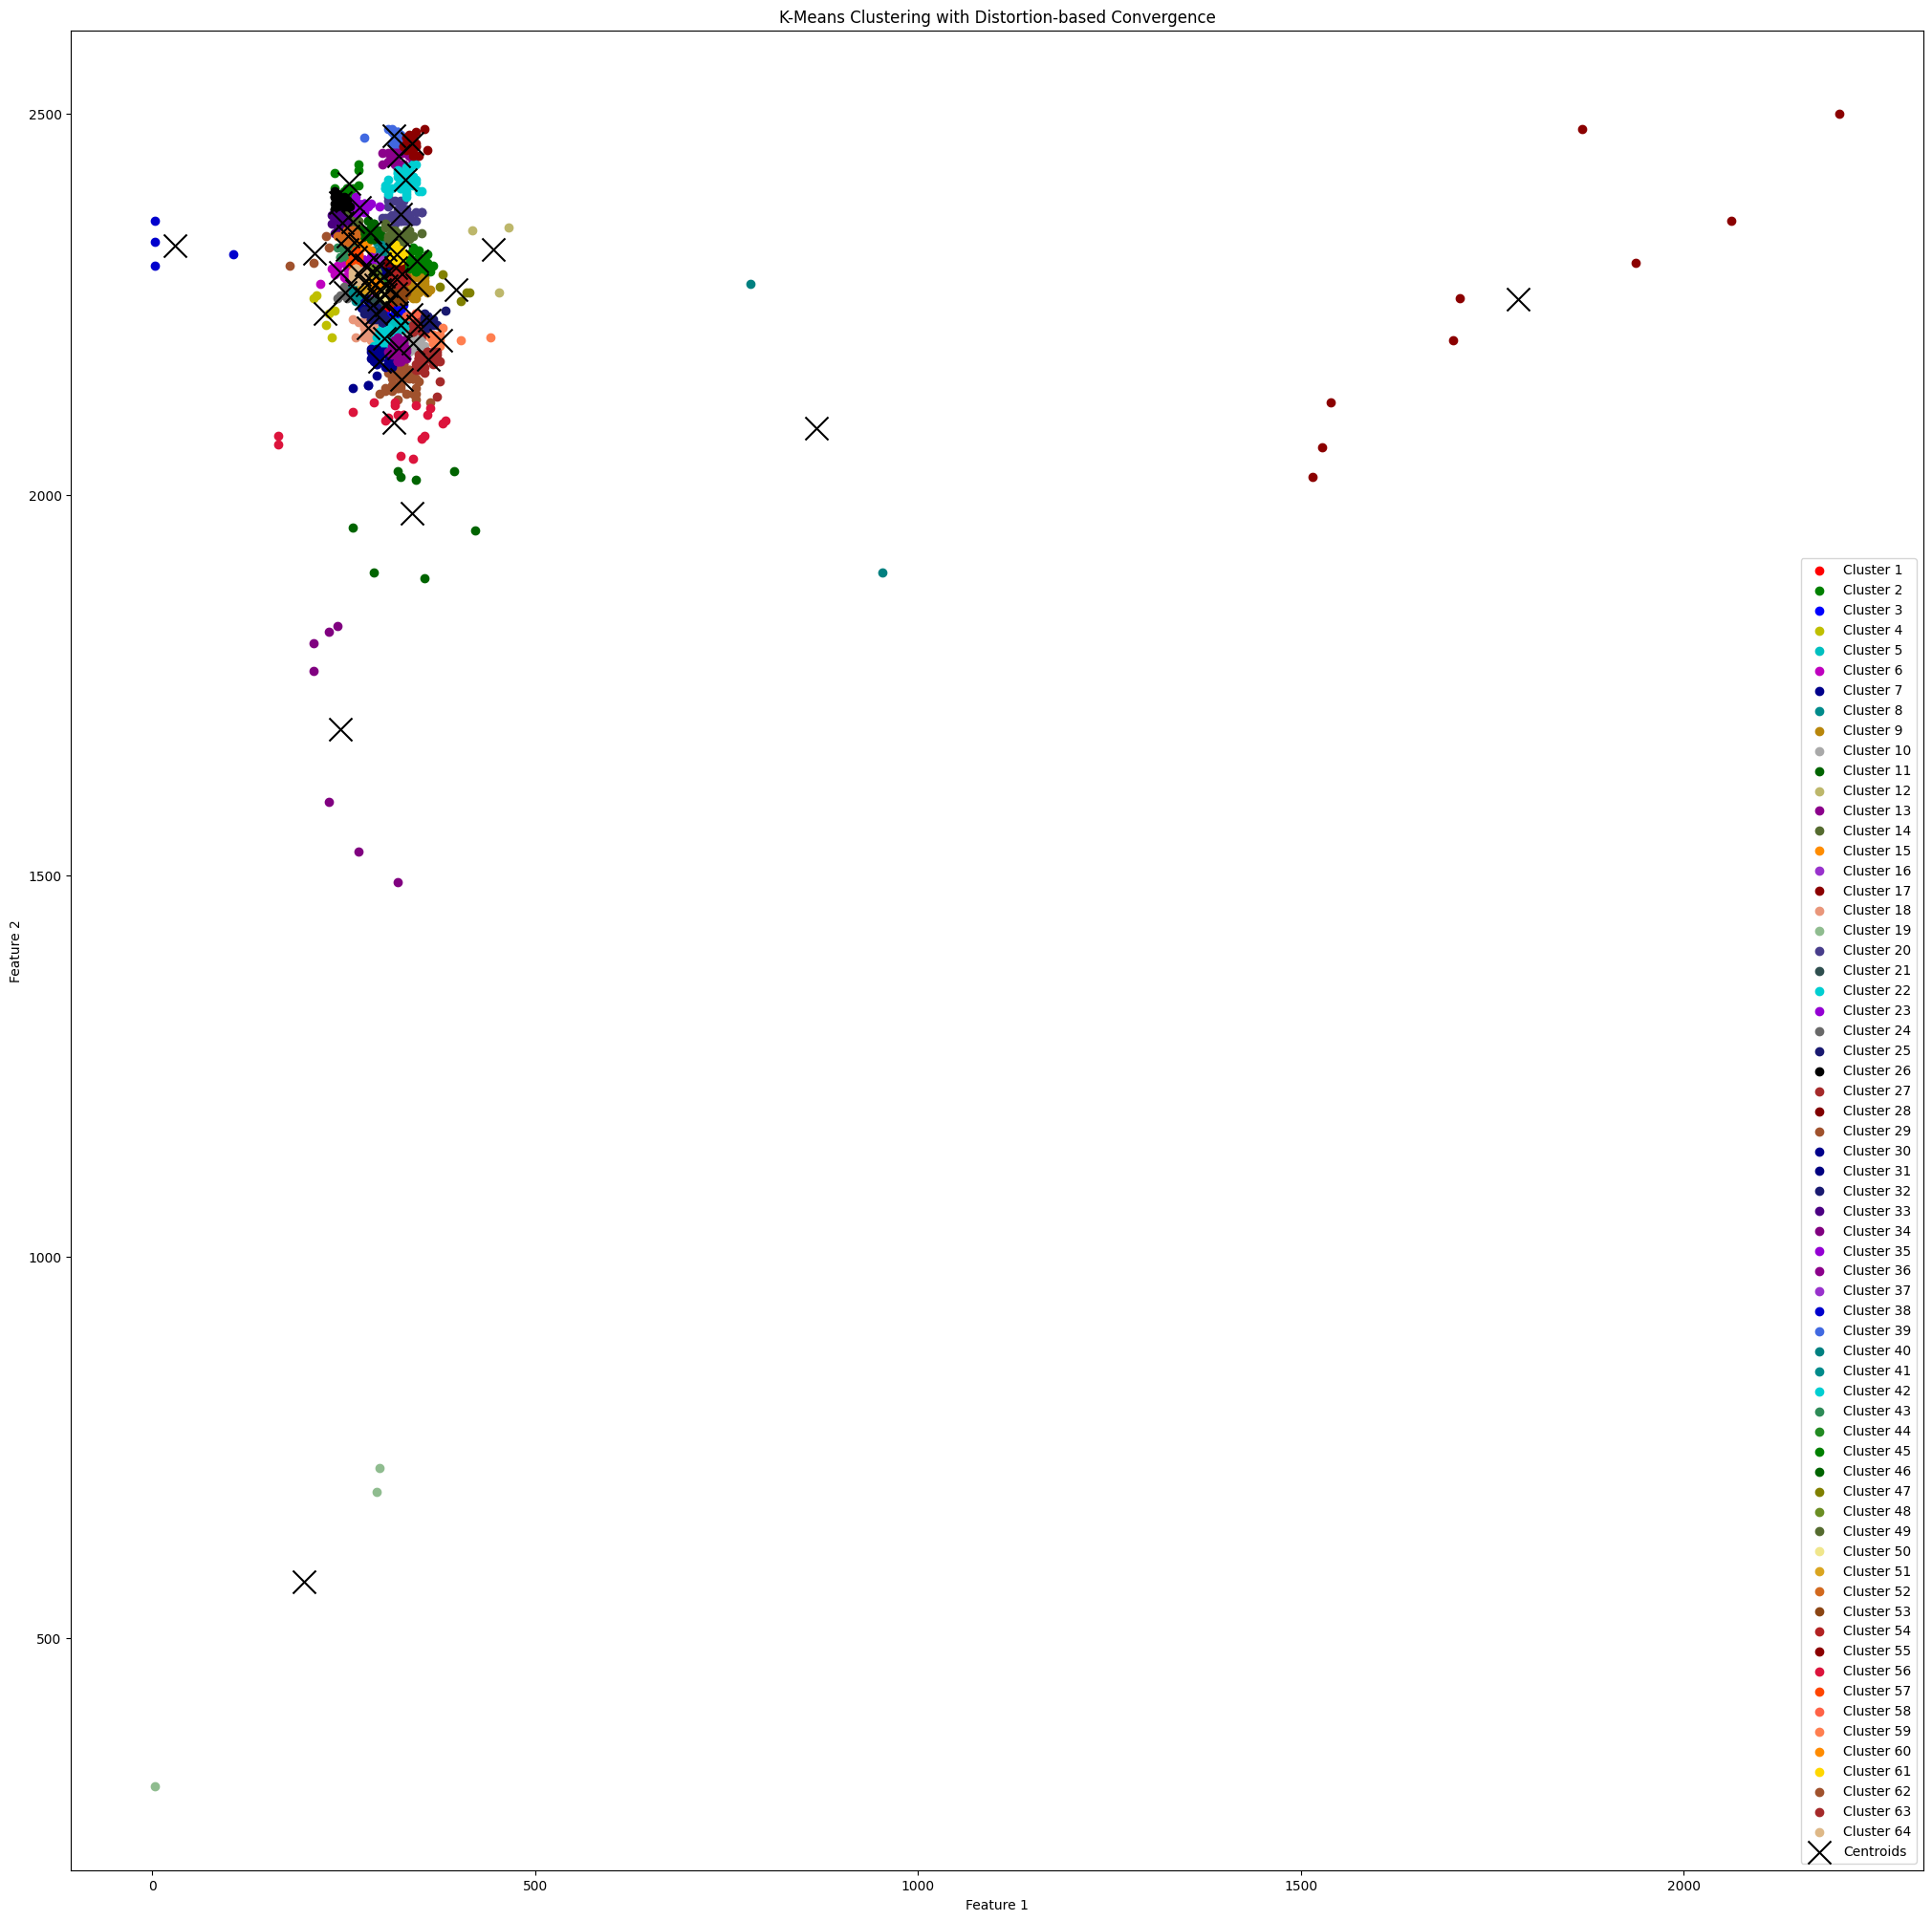

In [308]:
k=int(input("Enter K value "))
data1 =train_data1
centroids1, clusters1 = k_means_clustering(k, data1)
plot_clusters(data1, centroids1, clusters1)

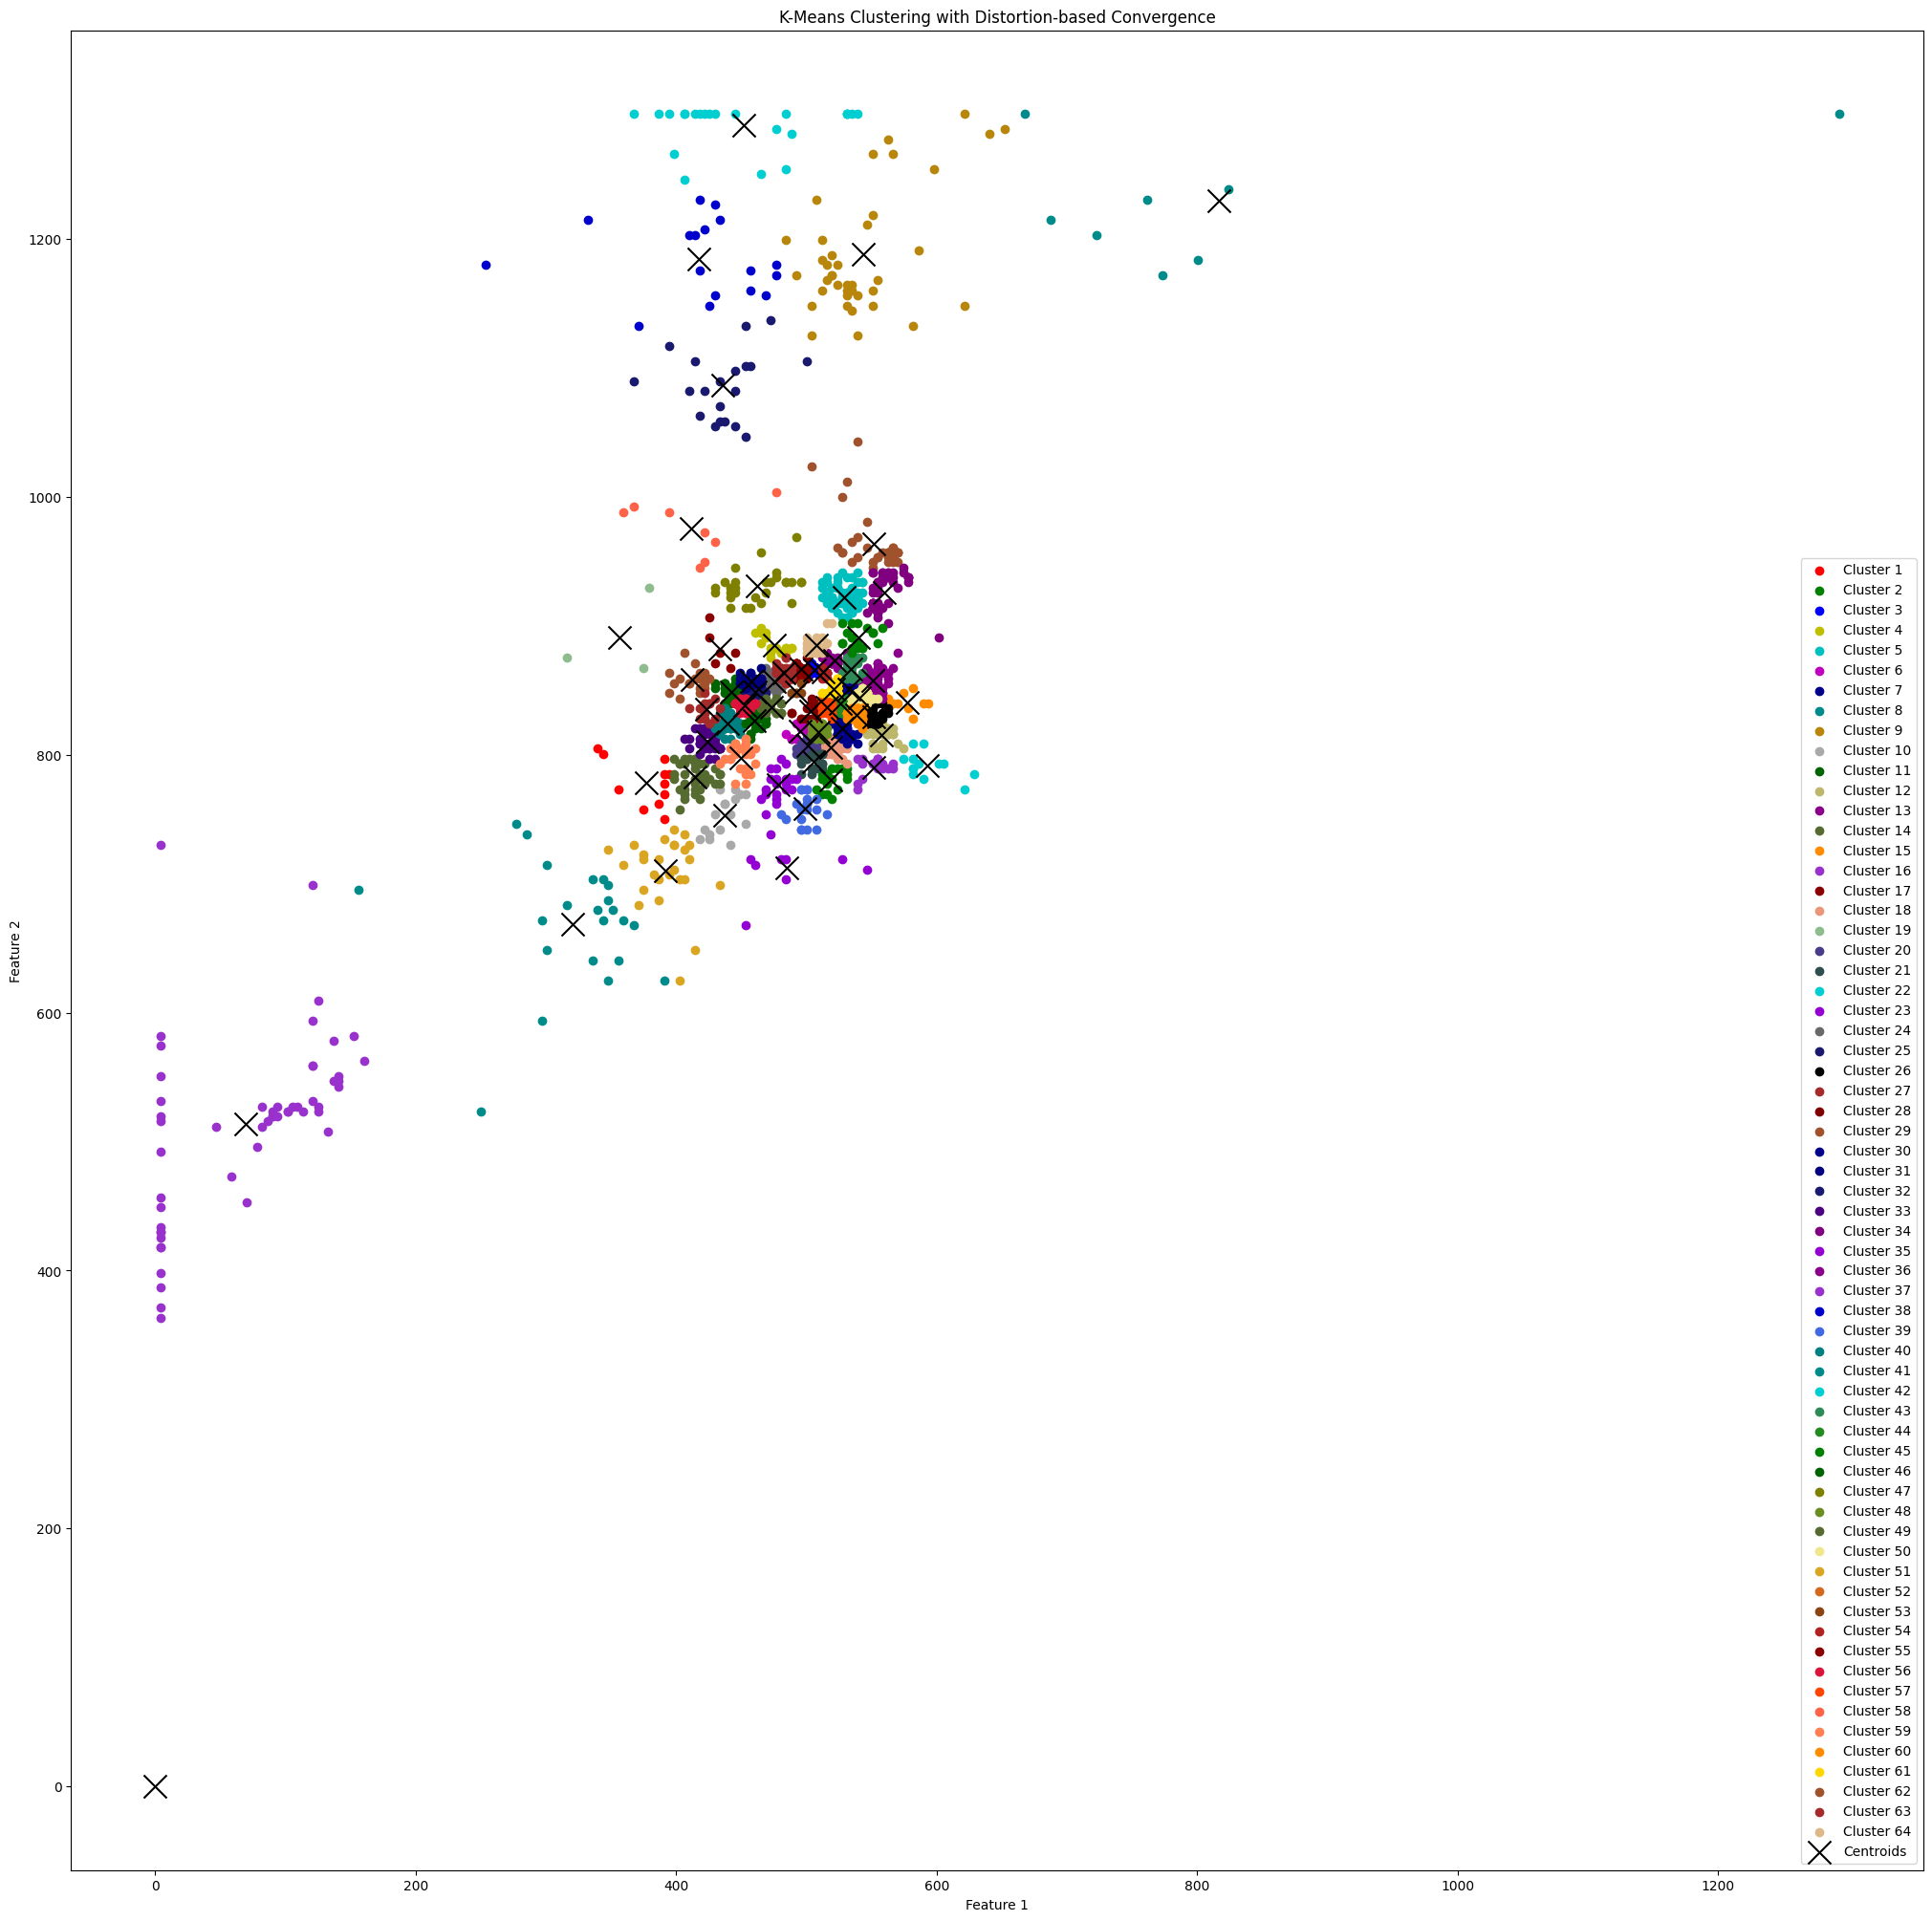

In [309]:
data2 =train_data2
centroids2, clusters2 = k_means_clustering(k, data2)
plot_clusters(data2, centroids2, clusters2)

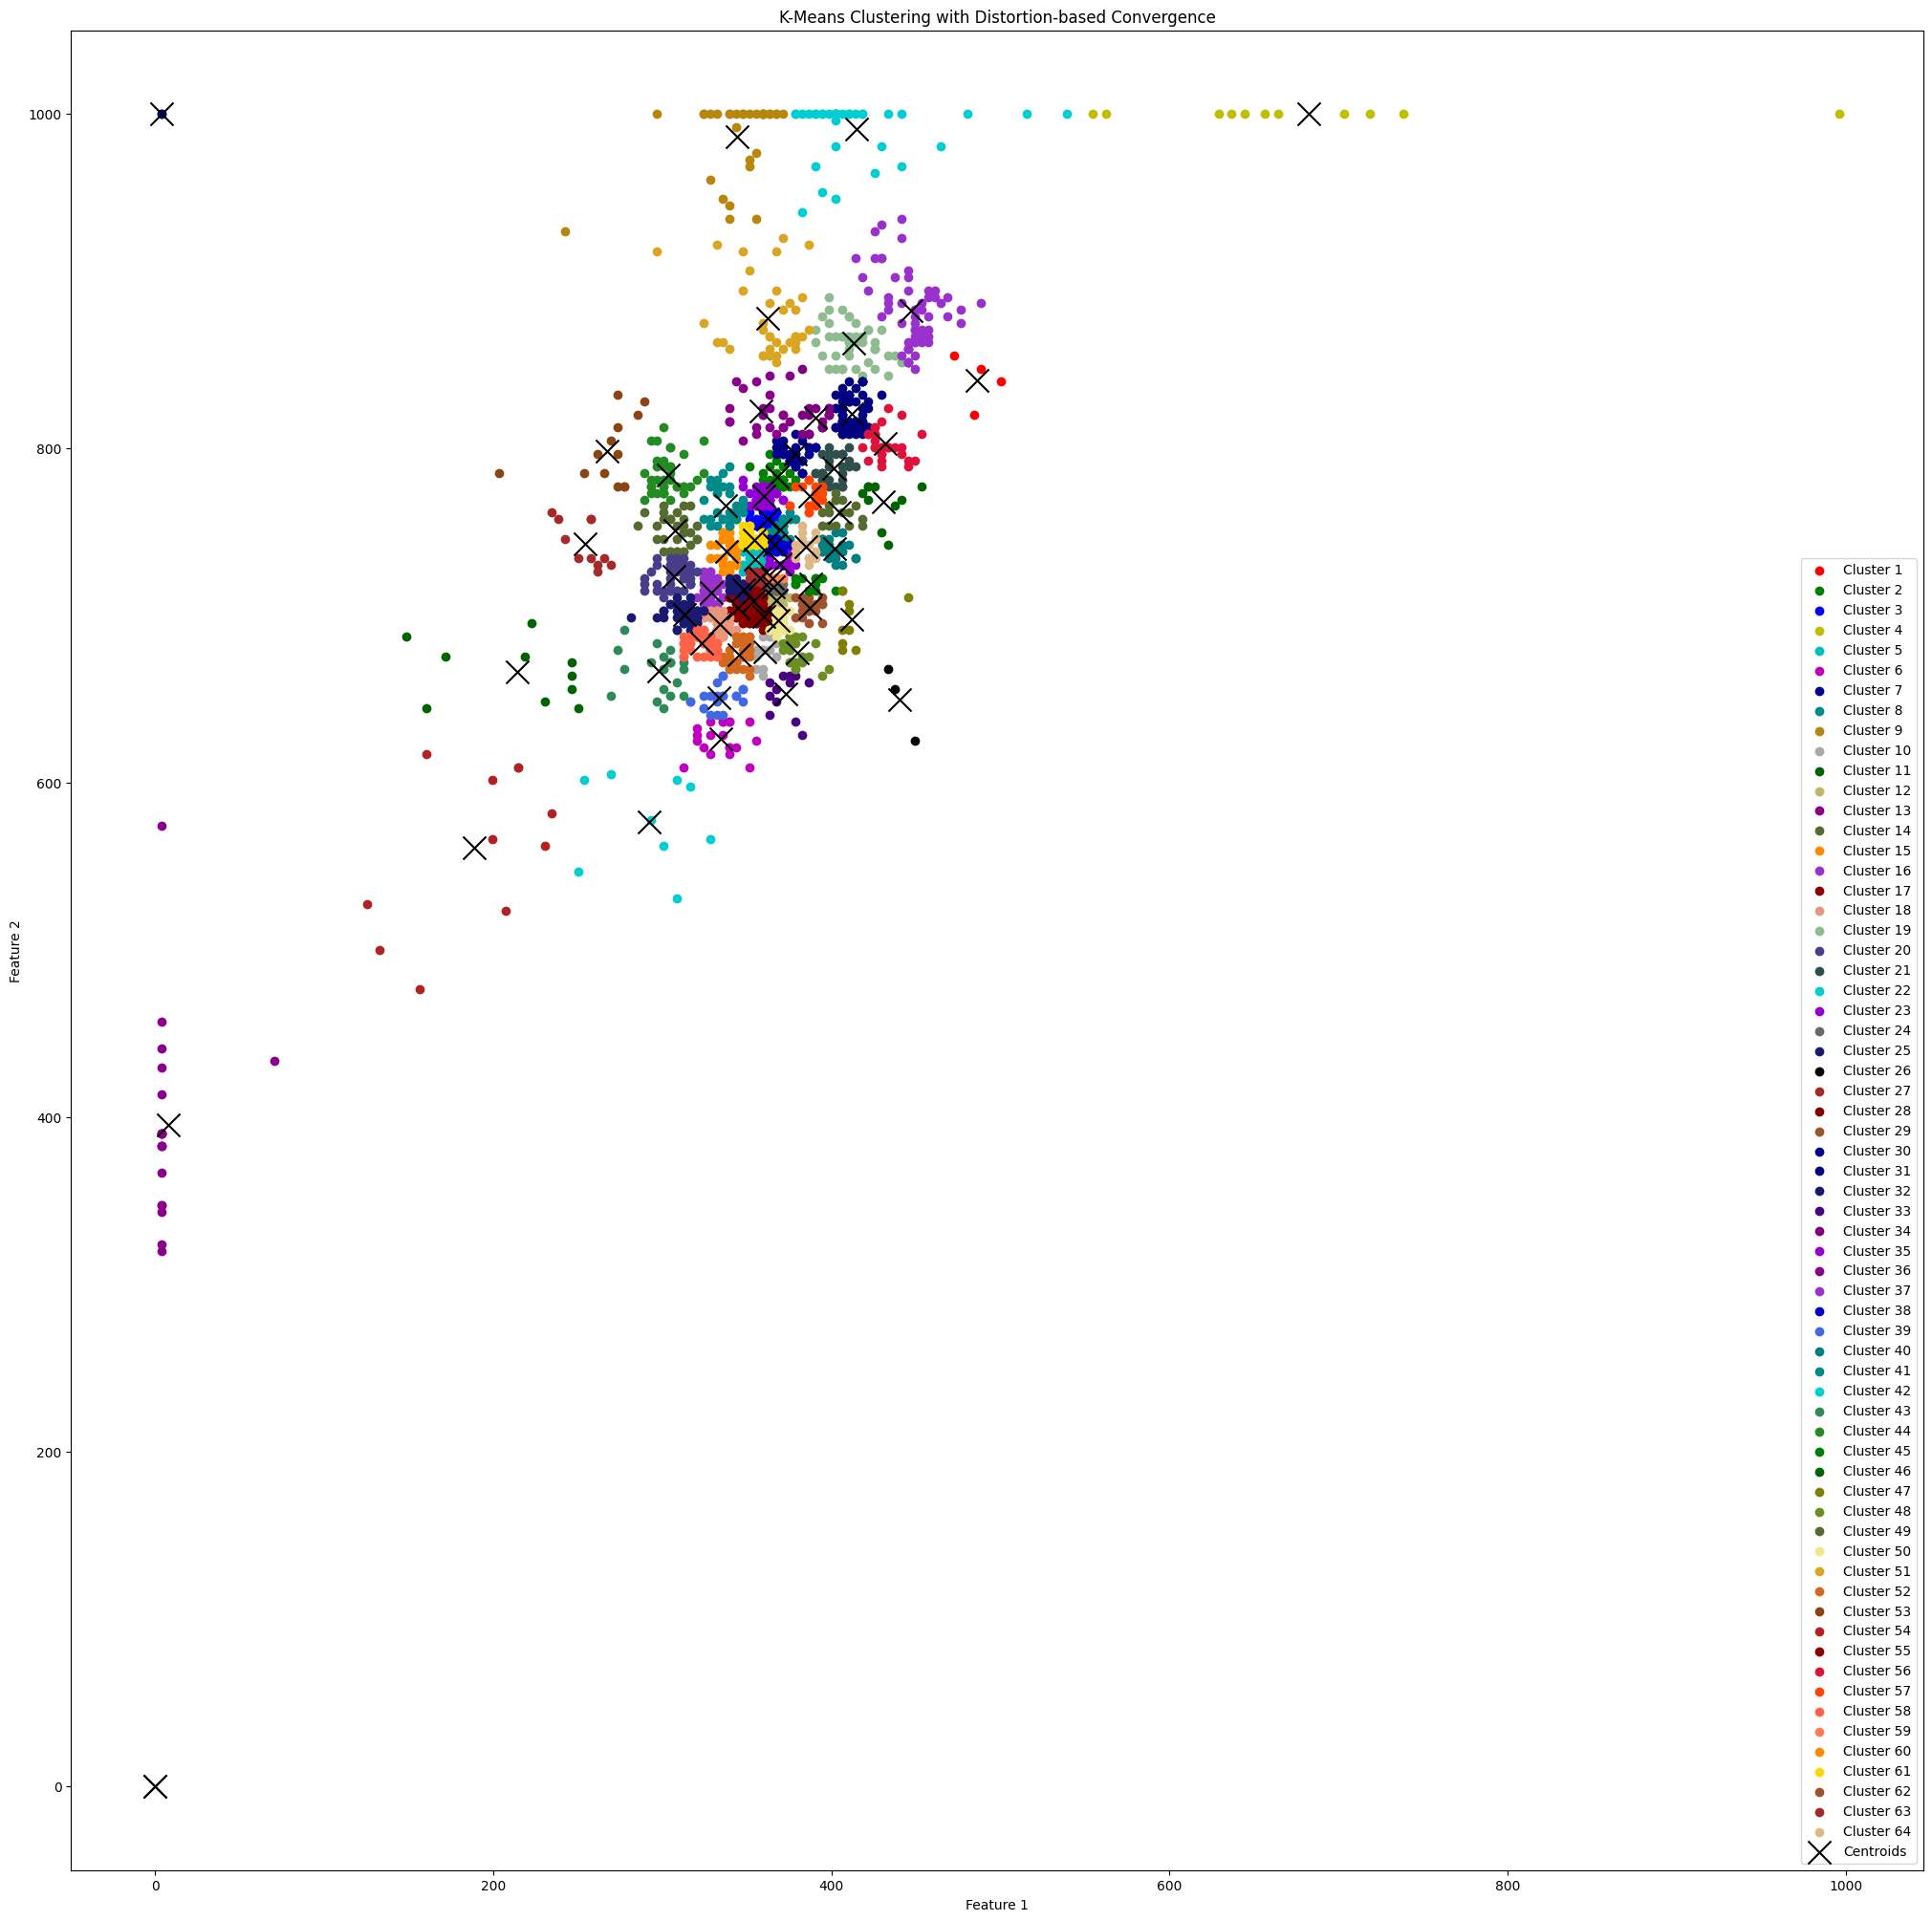

In [310]:
data3 =train_data3
centroids3, clusters3 = k_means_clustering(k, data3)
plot_clusters(data3, centroids3, clusters3)

In [311]:


def compute_cluster_covariance_and_weight(data, centroids, clusters):
    k = len(centroids)  # Number of clusters
    total_points = len(data) 
    
    covariance_matrices = []
    weights = []
    
    for i in range(k):
        cluster_points = data[clusters == i]
        num_points_in_cluster = len(cluster_points)
        
        if num_points_in_cluster > 1:
            cov_matrix = np.cov(cluster_points, rowvar=False)
        else:
            cov_matrix = np.zeros((data.shape[1], data.shape[1]))
        
        weight = num_points_in_cluster / total_points
        
        # Store the results
        covariance_matrices.append(cov_matrix)
        weights.append(weight)
    
    return covariance_matrices, weights

cov_matrices1, cluster_weights1 = compute_cluster_covariance_and_weight(data1, centroids1, clusters1)

for i, (cov_matrix, weight) in enumerate(zip(cov_matrices1, cluster_weights1)):
    print(f"Cluster {i+1}:")
    print(f"Covariance Matrix:\n{cov_matrix}")
    print(f"Weight: {weight}\n")

# Verify that the sum of all weights equals 1
print(f"Sum of all weights: {sum(cluster_weights1)}")


Cluster 1:
Covariance Matrix:
[[14.54492759 11.06485289]
 [11.06485289 21.77277504]]
Weight: 0.011370436864153202

Cluster 2:
Covariance Matrix:
[[139.70269097  48.828125  ]
 [ 48.828125   173.10248481]]
Weight: 0.005984440454817474

Cluster 3:
Covariance Matrix:
[[35.43870274 23.44965419]
 [23.44965419 38.70844325]]
Weight: 0.013165769000598444

Cluster 4:
Covariance Matrix:
[[ 118.50992839 -155.63964844]
 [-155.63964844  433.34960938]]
Weight: 0.003590664272890485

Cluster 5:
Covariance Matrix:
[[37.13719985 -2.86102295]
 [-2.86102295 22.88818359]]
Weight: 0.010173548773189706

Cluster 6:
Covariance Matrix:
[[126.11620354  25.89370265]
 [ 25.89370265  73.05723248]]
Weight: 0.00718132854578097

Cluster 7:
Covariance Matrix:
[[20.70198282  0.53539611]
 [ 0.53539611 39.79777732]]
Weight: 0.011370436864153202

Cluster 8:
Covariance Matrix:
[[28.26081605  0.33338531]
 [ 0.33338531 40.69865251]]
Weight: 0.020945541591861162

Cluster 9:
Covariance Matrix:
[[72.82236896 -1.04954634]
 [-1.049

In [312]:
cov_matrices2, cluster_weights2= compute_cluster_covariance_and_weight(data2, centroids2, clusters2)

for i, (cov_matrix, weight) in enumerate(zip(cov_matrices2, cluster_weights2)):
    print(f"Cluster {i+1}:")
    print(f"Covariance Matrix:\n{cov_matrix}")
    print(f"Weight: {weight}\n")

# Verify that the sum of all weights equals 1
print(f"Sum of all weights: {sum(cluster_weights2)}")

Cluster 1:
Covariance Matrix:
[[ 428.35582386 -179.49884588]
 [-179.49884588  323.76376065]]
Weight: 0.0064065230052417

Cluster 2:
Covariance Matrix:
[[50.75555099 19.59549753]
 [19.59549753 50.23353978]]
Weight: 0.011648223645894

Cluster 3:
Covariance Matrix:
[[3.84675355 0.38467535]
 [0.38467535 4.43658909]]
Weight: 0.0203843913803145

Cluster 4:
Covariance Matrix:
[[ 79.9964456  -41.45678352]
 [-41.45678352  47.7959128 ]]
Weight: 0.009900990099009901

Cluster 5:
Covariance Matrix:
[[ 78.83432749 -10.14503273]
 [-10.14503273  64.05942075]]
Weight: 0.043680838672102505

Cluster 6:
Covariance Matrix:
[[27.74690327 14.61631373]
 [14.61631373 18.31054688]]
Weight: 0.011648223645894

Cluster 7:
Covariance Matrix:
[[17.8272674   5.60164848]
 [ 5.60164848  8.17857575]]
Weight: 0.025043680838672103

Cluster 8:
Covariance Matrix:
[[2471.92382812  -51.58923921]
 [ -51.58923921 2397.28126691]]
Weight: 0.0128130460104834

Cluster 9:
Covariance Matrix:
[[1559.75300613 1014.46236676]
 [1014.4623

In [313]:
cov_matrices3, cluster_weights3 = compute_cluster_covariance_and_weight(data3, centroids3, clusters3)

for i, (cov_matrix, weight) in enumerate(zip(cov_matrices3, cluster_weights3)):
    print(f"Cluster {i+1}:")
    print(f"Covariance Matrix:\n{cov_matrix}")
    print(f"Weight: {weight}\n")

# Verify that the sum of all weights equals 1
print(f"Sum of all weights: {sum(cluster_weights3)}")

Cluster 1:
Covariance Matrix:
[[127.15657552 -53.40576172]
 [-53.40576172 227.61027018]]
Weight: 0.0022975301550832855

Cluster 2:
Covariance Matrix:
[[ 35.58373734 -13.11773368]
 [-13.11773368  27.56231858]]
Weight: 0.013210798391728892

Cluster 3:
Covariance Matrix:
[[13.11657475  2.02253753]
 [ 2.02253753  7.91063496]]
Weight: 0.02929350947731189

Cluster 4:
Covariance Matrix:
[[14136.57448509     0.        ]
 [    0.             0.        ]]
Weight: 0.006318207926479035

Cluster 5:
Covariance Matrix:
[[18.94194504  1.29662124]
 [ 1.29662124 14.5447078 ]]
Weight: 0.01665709362435382

Cluster 6:
Covariance Matrix:
[[135.36152087   7.58923982]
 [  7.58923982  82.35730623]]
Weight: 0.011487650775416428

Cluster 7:
Covariance Matrix:
[[47.52022879 -5.43674501]
 [-5.43674501 33.15901556]]
Weight: 0.020103388856978748

Cluster 8:
Covariance Matrix:
[[10.80830892  3.58763195]
 [ 3.58763195 14.33755265]]
Weight: 0.028144744399770247

Cluster 9:
Covariance Matrix:
[[596.0618296  232.05049576

In [314]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# Bright color definitions for clusters
def get_cluster_colors(n):
    # Define a list of distinct bright colors
    bright_colors = [
    'red', 'green', 'blue', 'black', 'darkorange', 'cyan', 
    'magenta', 'yellow', 'purple', 'pink', 'lime', 
    'gold', 'teal', 'violet', 'crimson', 'navy', 
    'orange', 'brown', 'chartreuse', 'salmon', 'skyblue',
    'darkviolet', 'mediumseagreen', 'dodgerblue', 'slateblue',
    'coral', 'lightcoral', 'turquoise', 'lightgreen', 
    'indigo', 'lightblue', 'lavender', 'peachpuff', 
    'khaki', 'wheat', 'lightgrey', 'plum', 'mediumslateblue',
    'palegoldenrod', 'lightcyan', 'mistyrose', 'lightpink',
    'springgreen', 'seashell', 'mediumpurple', 'darkkhaki',
    'sienna', 'mediumvioletred', 'rosybrown', 'darkgreen',
    'lightyellow', 'lightsalmon', 'orangered', 'lightskyblue',
    'darksalmon', 'firebrick', 'slategray', 'lightsteelblue',
    'lavenderblush', 'lightseagreen', 'powderblue', 'goldenrod',
    'lightslategray', 'tomato', 'chartreuse', 'lightcyan',
    'darkslategray', 'mediumturquoise', 'steelblue', 'lightgoldenrodyellow',
    'darkorange', 'dimgray', 'darkgray', 'bisque', 
    'mediumspringgreen', 'lightcoral', 'lightgreen', 'beige'
]

    
    # Ensure we do not exceed the number of defined colors
    return bright_colors[:n]
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def fit_k_gaussians(data, centroids, cov_matrices, cluster_weights, tolerance=1e-5):
    log_likelihoods = []
    n_samples, n_features = data.shape
    n_clusters = len(centroids)

    while True:
        responsibilities = np.zeros((n_samples, n_clusters))

        # E-step: Calculate responsibilities
        for i in range(n_clusters):
            try:
                responsibilities[:, i] = cluster_weights[i] * multivariate_normal.pdf(
                    data,
                    mean=centroids[i],
                    cov=cov_matrices[i] + 1e-6 * np.eye(n_features)  # Regularization
                )
            except np.linalg.LinAlgError:
                # Handle singular matrix case
                responsibilities[:, i] = 0

        responsibilities_sum = responsibilities.sum(axis=1, keepdims=True)
        responsibilities /= (responsibilities_sum + 1e-10)  # Avoid division by zero

        log_likelihood = np.sum(np.log(responsibilities_sum + 1e-10))  # Log-likelihood
        log_likelihoods.append(log_likelihood)

        if len(log_likelihoods) > 1 and np.abs(log_likelihoods[-1] - log_likelihoods[-2]) < tolerance:
            break

        # M-step: Update parameters
        for i in range(n_clusters):
            N_k = responsibilities[:, i].sum()

            if N_k > 0:  # Avoid division by zero
                cluster_weights[i] = N_k / n_samples
                centroids[i] = (responsibilities[:, i][:, np.newaxis] * data).sum(axis=0) / N_k

                diff = data - centroids[i]
                cov_matrices[i] = (responsibilities[:, i][:, np.newaxis] * diff).T @ diff / N_k

                # Ensure covariance matrix is positive definite
                cov_matrices[i] += 1e-6 * np.eye(n_features)  # Regularization
            else:
                # Handle cases where a cluster has zero responsibility
                cluster_weights[i] = 0
                cov_matrices[i] = np.eye(n_features)  # Default covariance for empty cluster

    return centroids, cov_matrices, cluster_weights, log_likelihoods, len(log_likelihoods)

def plot_results(log_likelihoods, data, centroids, cov_matrices, cluster_weights, class_label, num_clusters):
    plt.figure(figsize=(15, 15), dpi=200)
    plt.title(f'Gaussian Mixture Model - {class_label}', fontsize=16)

    # Create a meshgrid for contour plotting
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    X, Y = np.mgrid[x_min:x_max:300j, y_min:y_max:300j]  # Increased resolution
    pos = np.dstack((X, Y))

    # Get distinct colors for clusters
    cluster_colors = get_cluster_colors(num_clusters)

    # Plot the Gaussian components
    for i in range(num_clusters):
        try:
            Z_i = cluster_weights[i] * multivariate_normal.pdf(pos, mean=centroids[i], cov=cov_matrices[i])
            plt.contour(X, Y, Z_i, levels=10, colors=cluster_colors[i], alpha=0.5)
        except np.linalg.LinAlgError:
            # Handle singular covariance case
            continue

    plt.scatter(data[:, 0], data[:, 1], c='black', s=10, label='Data Points', alpha=0.5)

    # Plot centroids with black color
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='X', label='Centroids')

    plt.xlabel('Feature 1', fontsize=14)
    plt.ylabel('Feature 2', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid()
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

def plot_log_likelihood(log_likelihoods, class_label):
    plt.figure(figsize=(12, 6), dpi=200)
    plt.plot(log_likelihoods, color='orange', linewidth=2)
    plt.title(f'Log-Likelihood vs. Iterations - {class_label}', fontsize=16)
    plt.xlabel('Iterations', fontsize=14)
    plt.ylabel('Log-Likelihood', fontsize=14)
    plt.grid()
    plt.show()





Class 1 converged in 807 iterations.


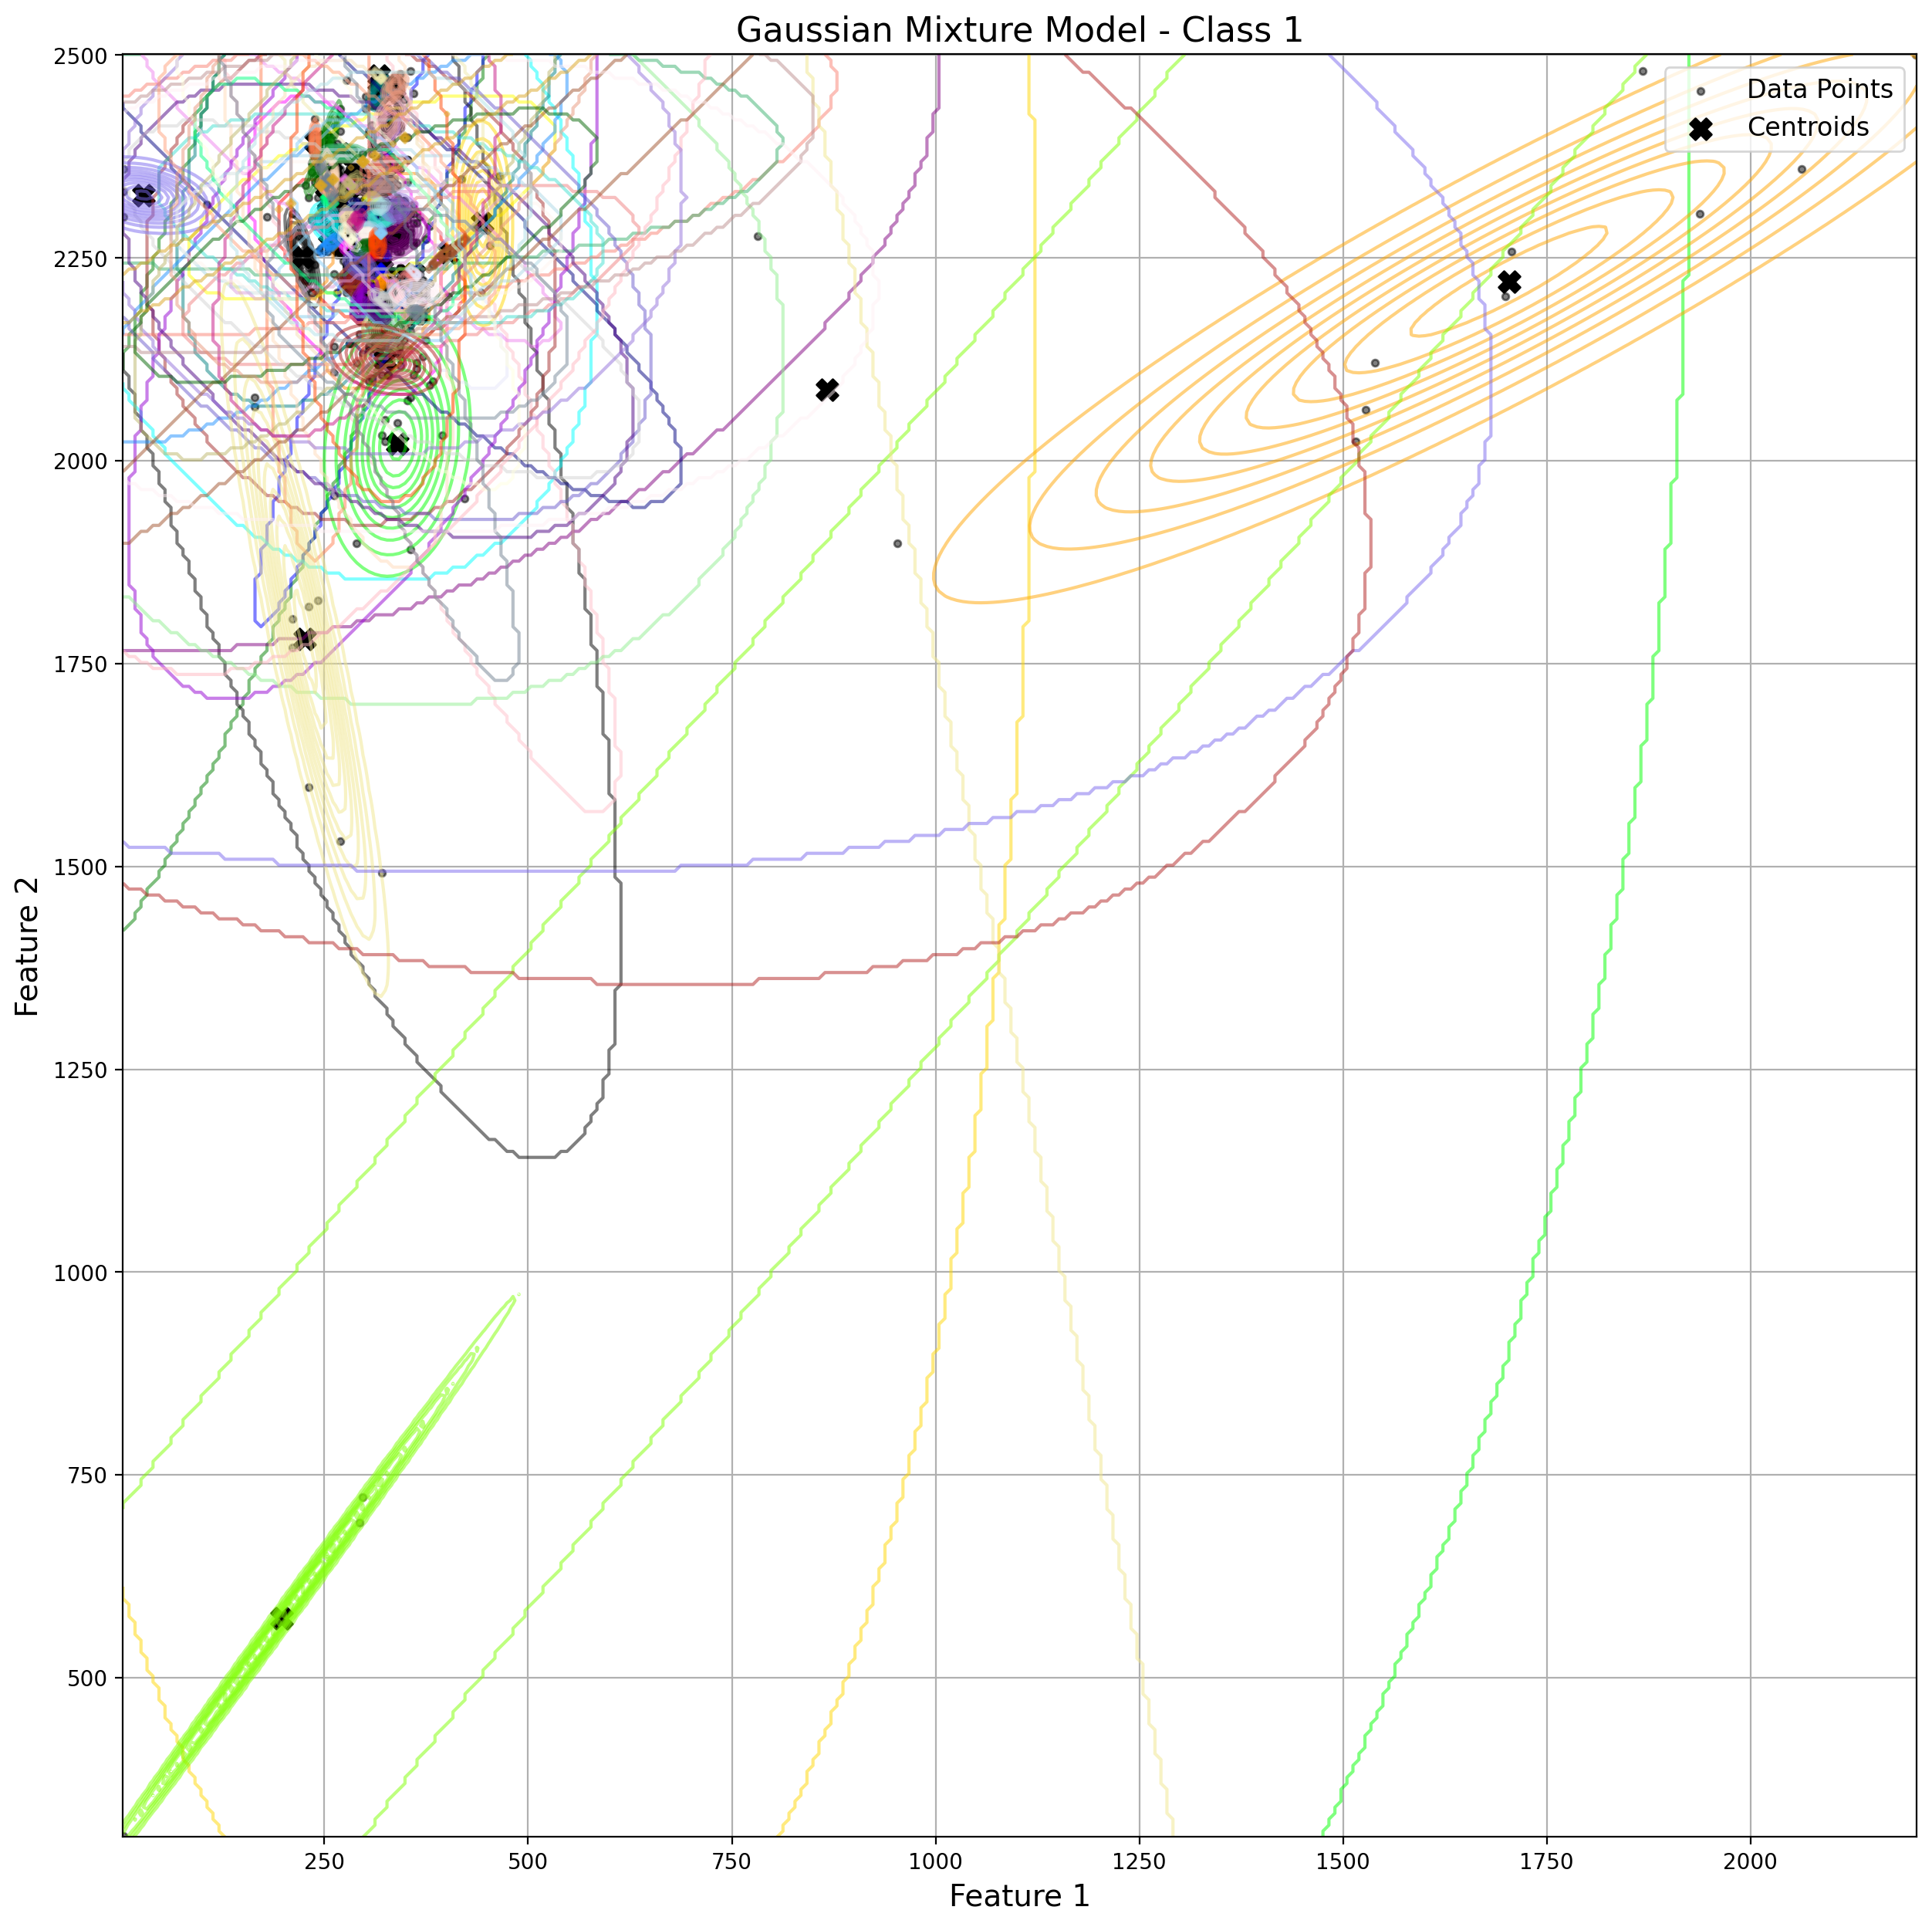

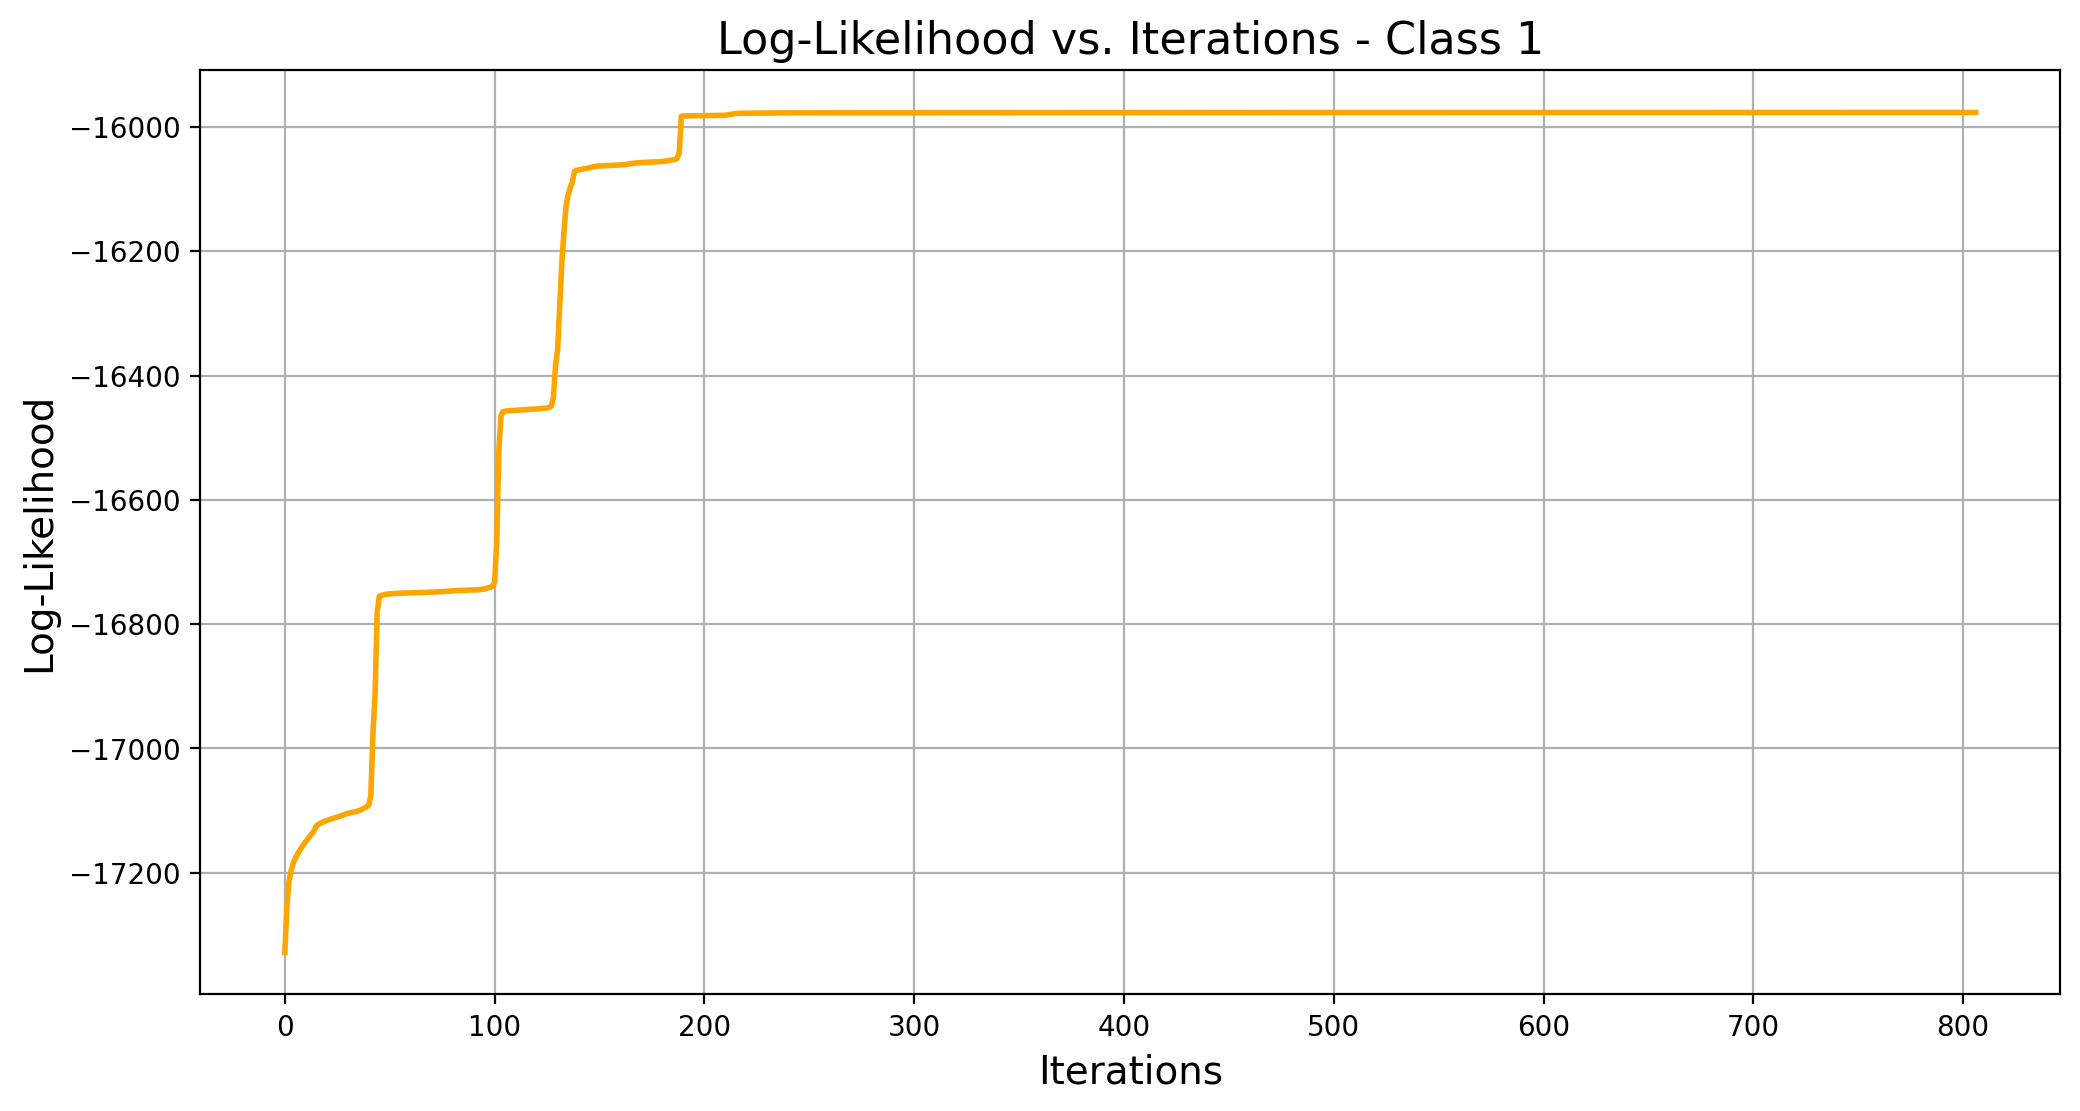

In [315]:
tolerance=1e-4
centroids1, cov_matrices1, cluster_weights1, log_likelihoods1, iterations1 = fit_k_gaussians(data1, centroids1, cov_matrices1, cluster_weights1, tolerance)
print(f"Class 1 converged in {iterations1} iterations.")
plot_results(log_likelihoods1, data1, centroids1, cov_matrices1, cluster_weights1, "Class 1", len(centroids1))
plot_log_likelihood(log_likelihoods1, "Class 1")

Class 2 converged in 253 iterations.


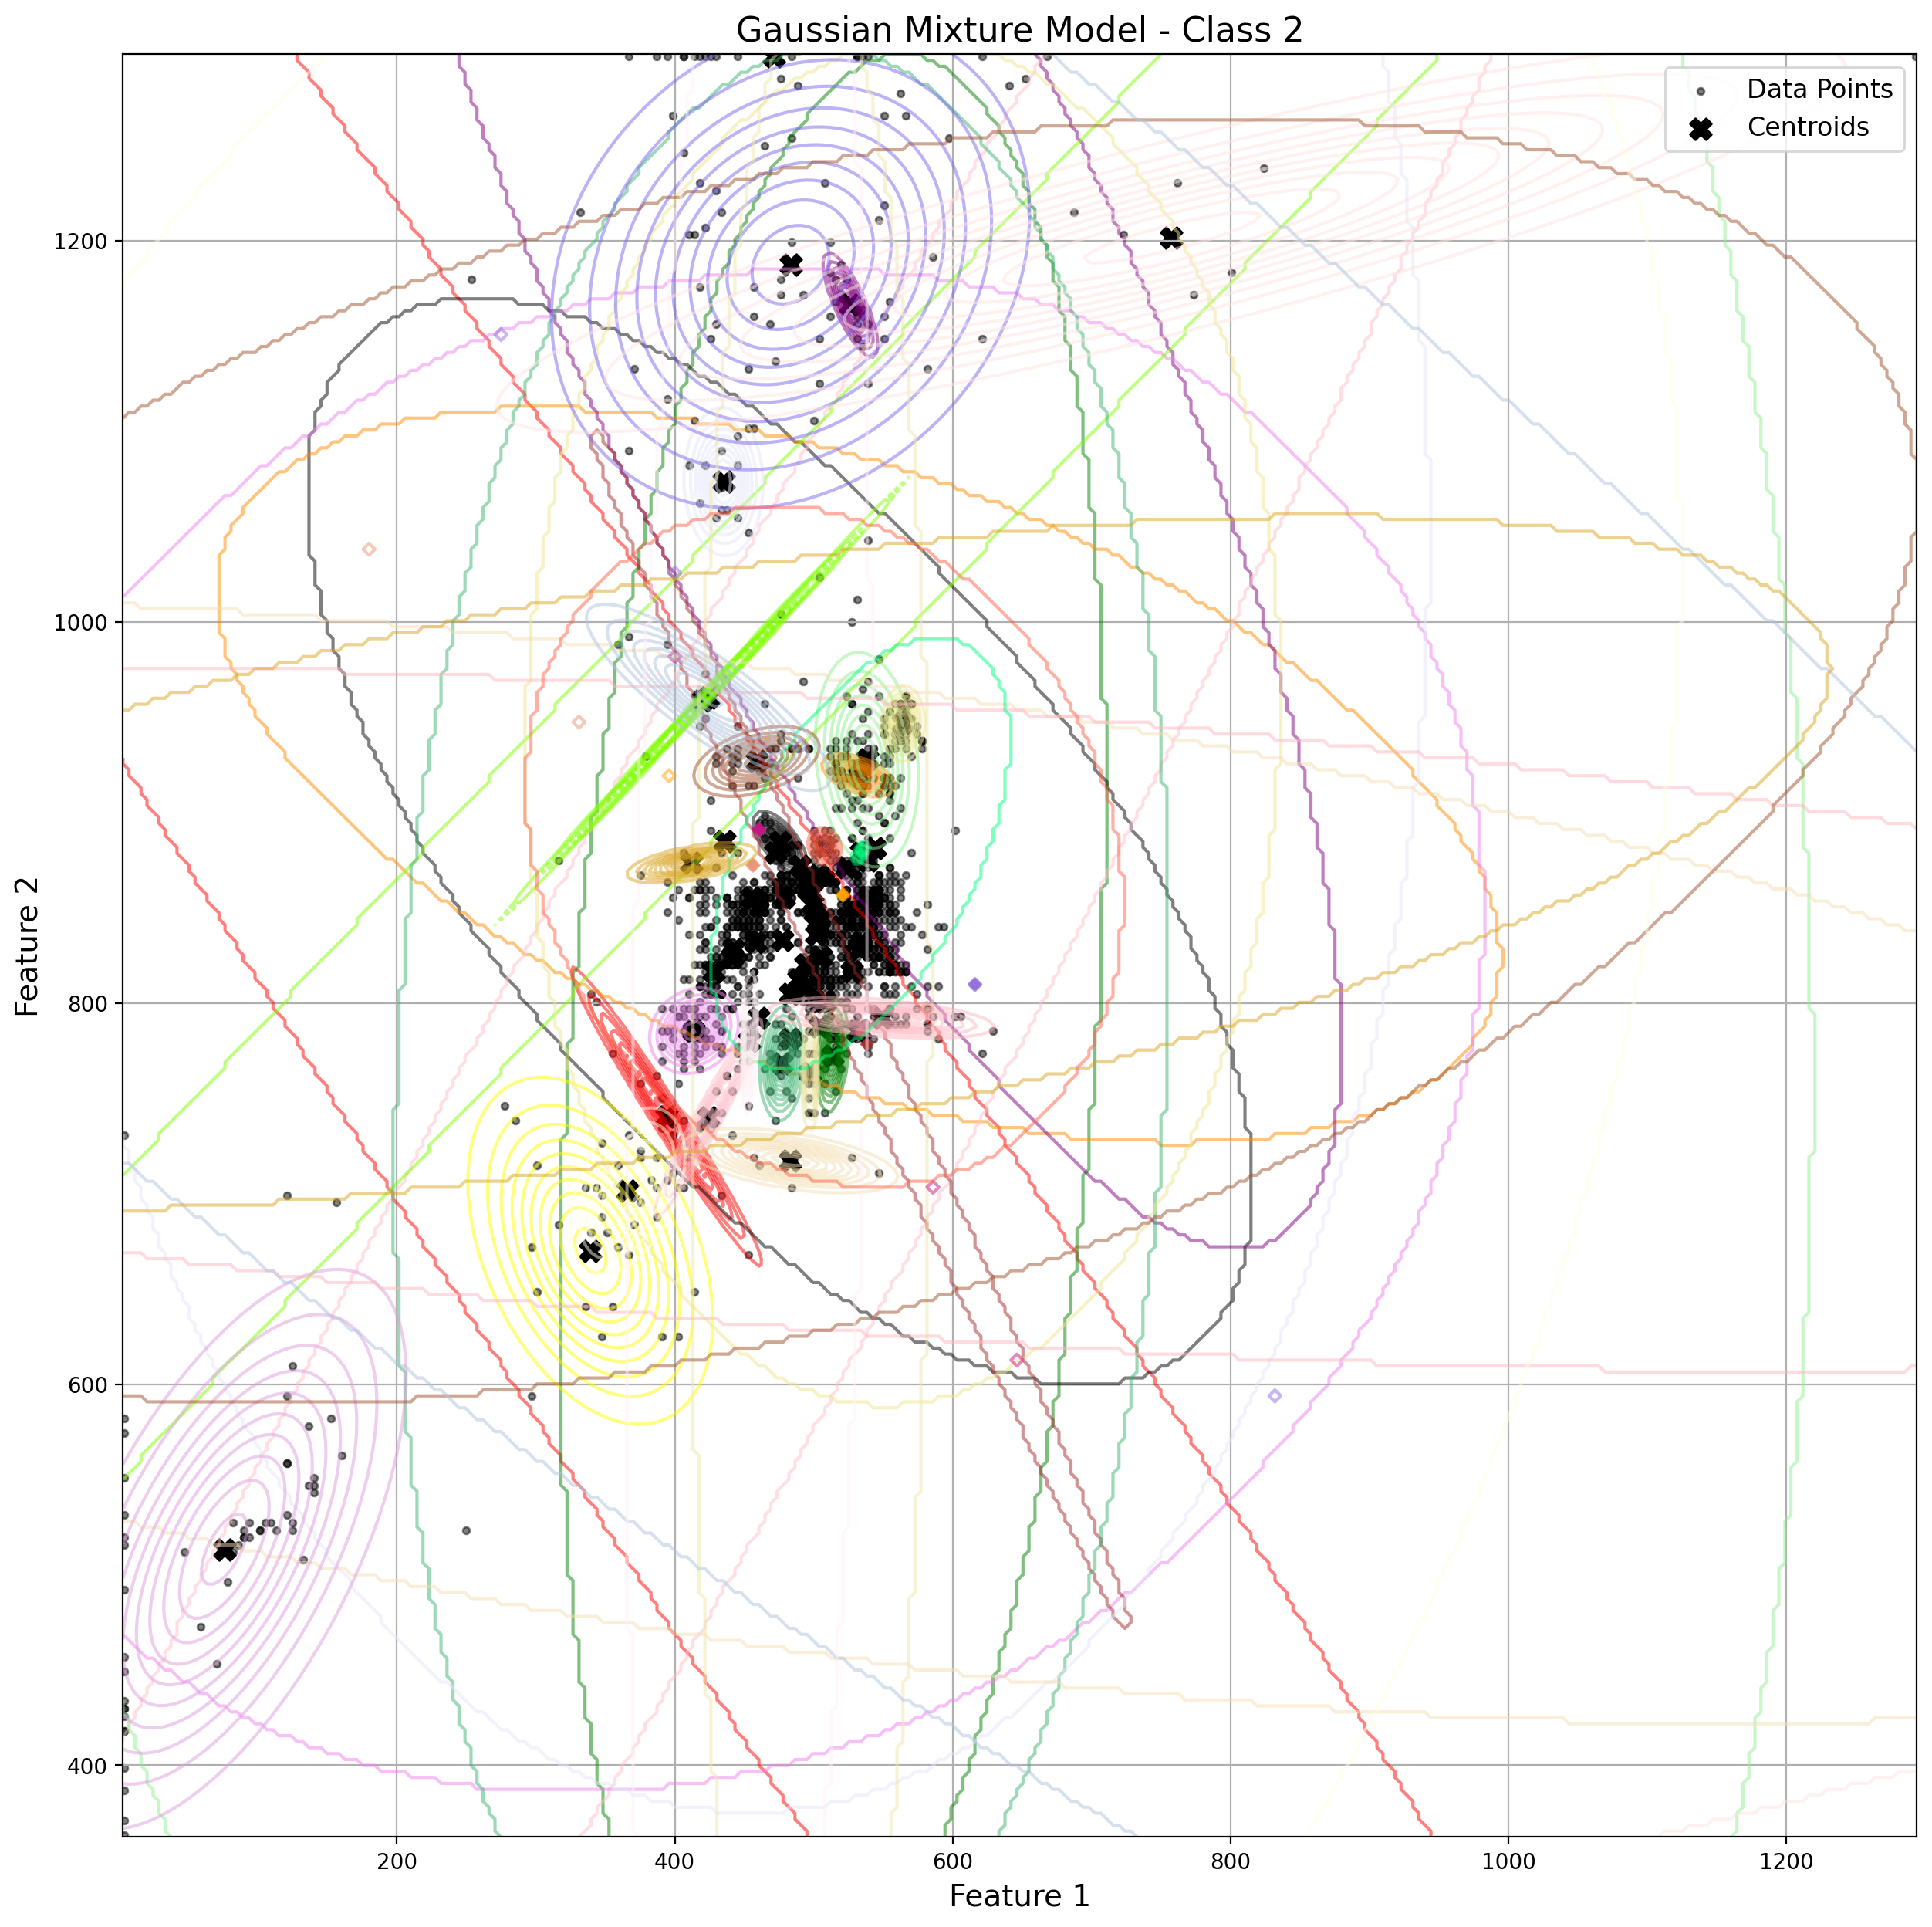

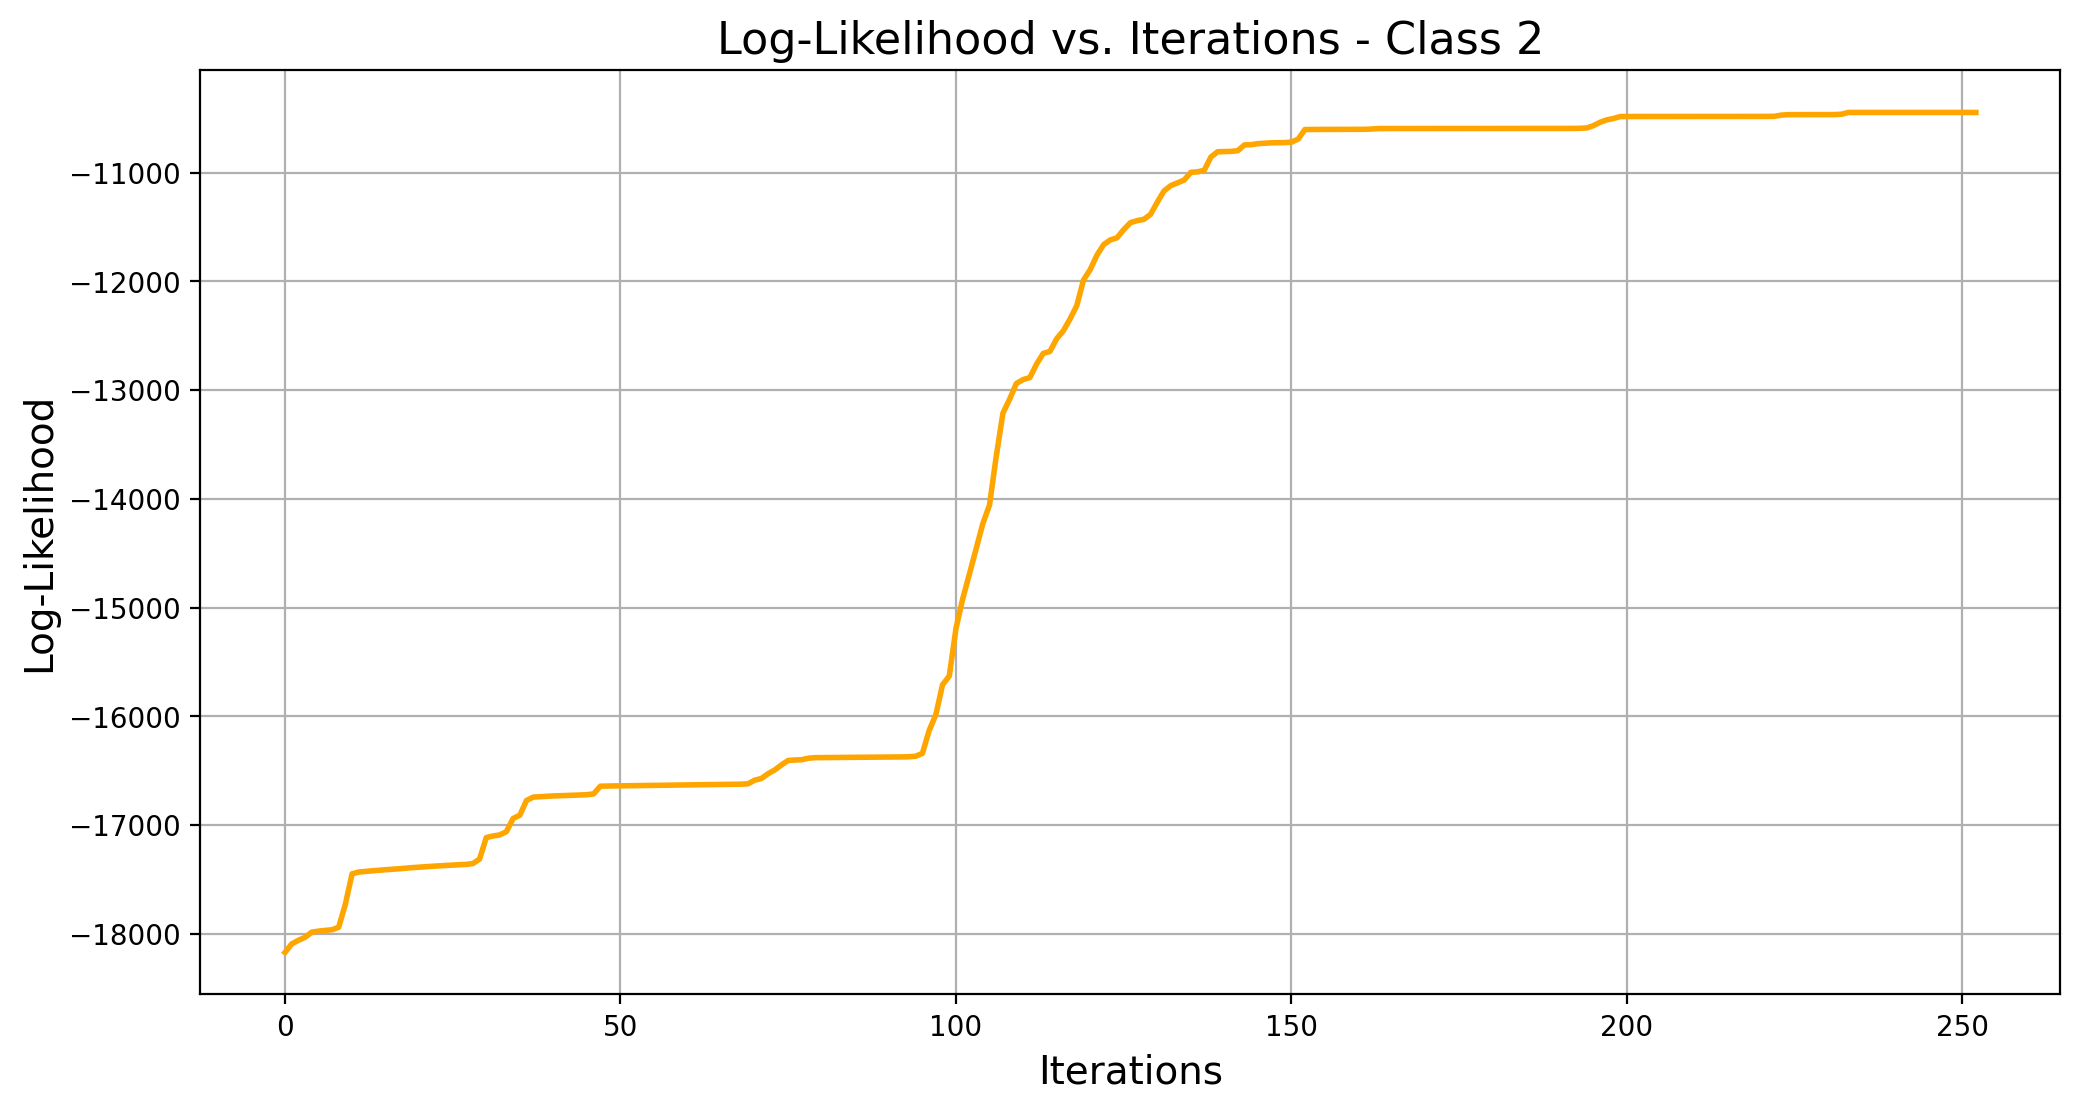

In [316]:
centroids2, cov_matrices2, cluster_weights2, log_likelihoods2, iterations2 = fit_k_gaussians(data2, centroids2, cov_matrices2, cluster_weights2, tolerance)
print(f"Class 2 converged in {iterations2} iterations.")
plot_results(log_likelihoods2, data2, centroids2, cov_matrices2, cluster_weights2, "Class 2", len(centroids2))
plot_log_likelihood(log_likelihoods2, "Class 2")

Class 3 converged in 357 iterations.


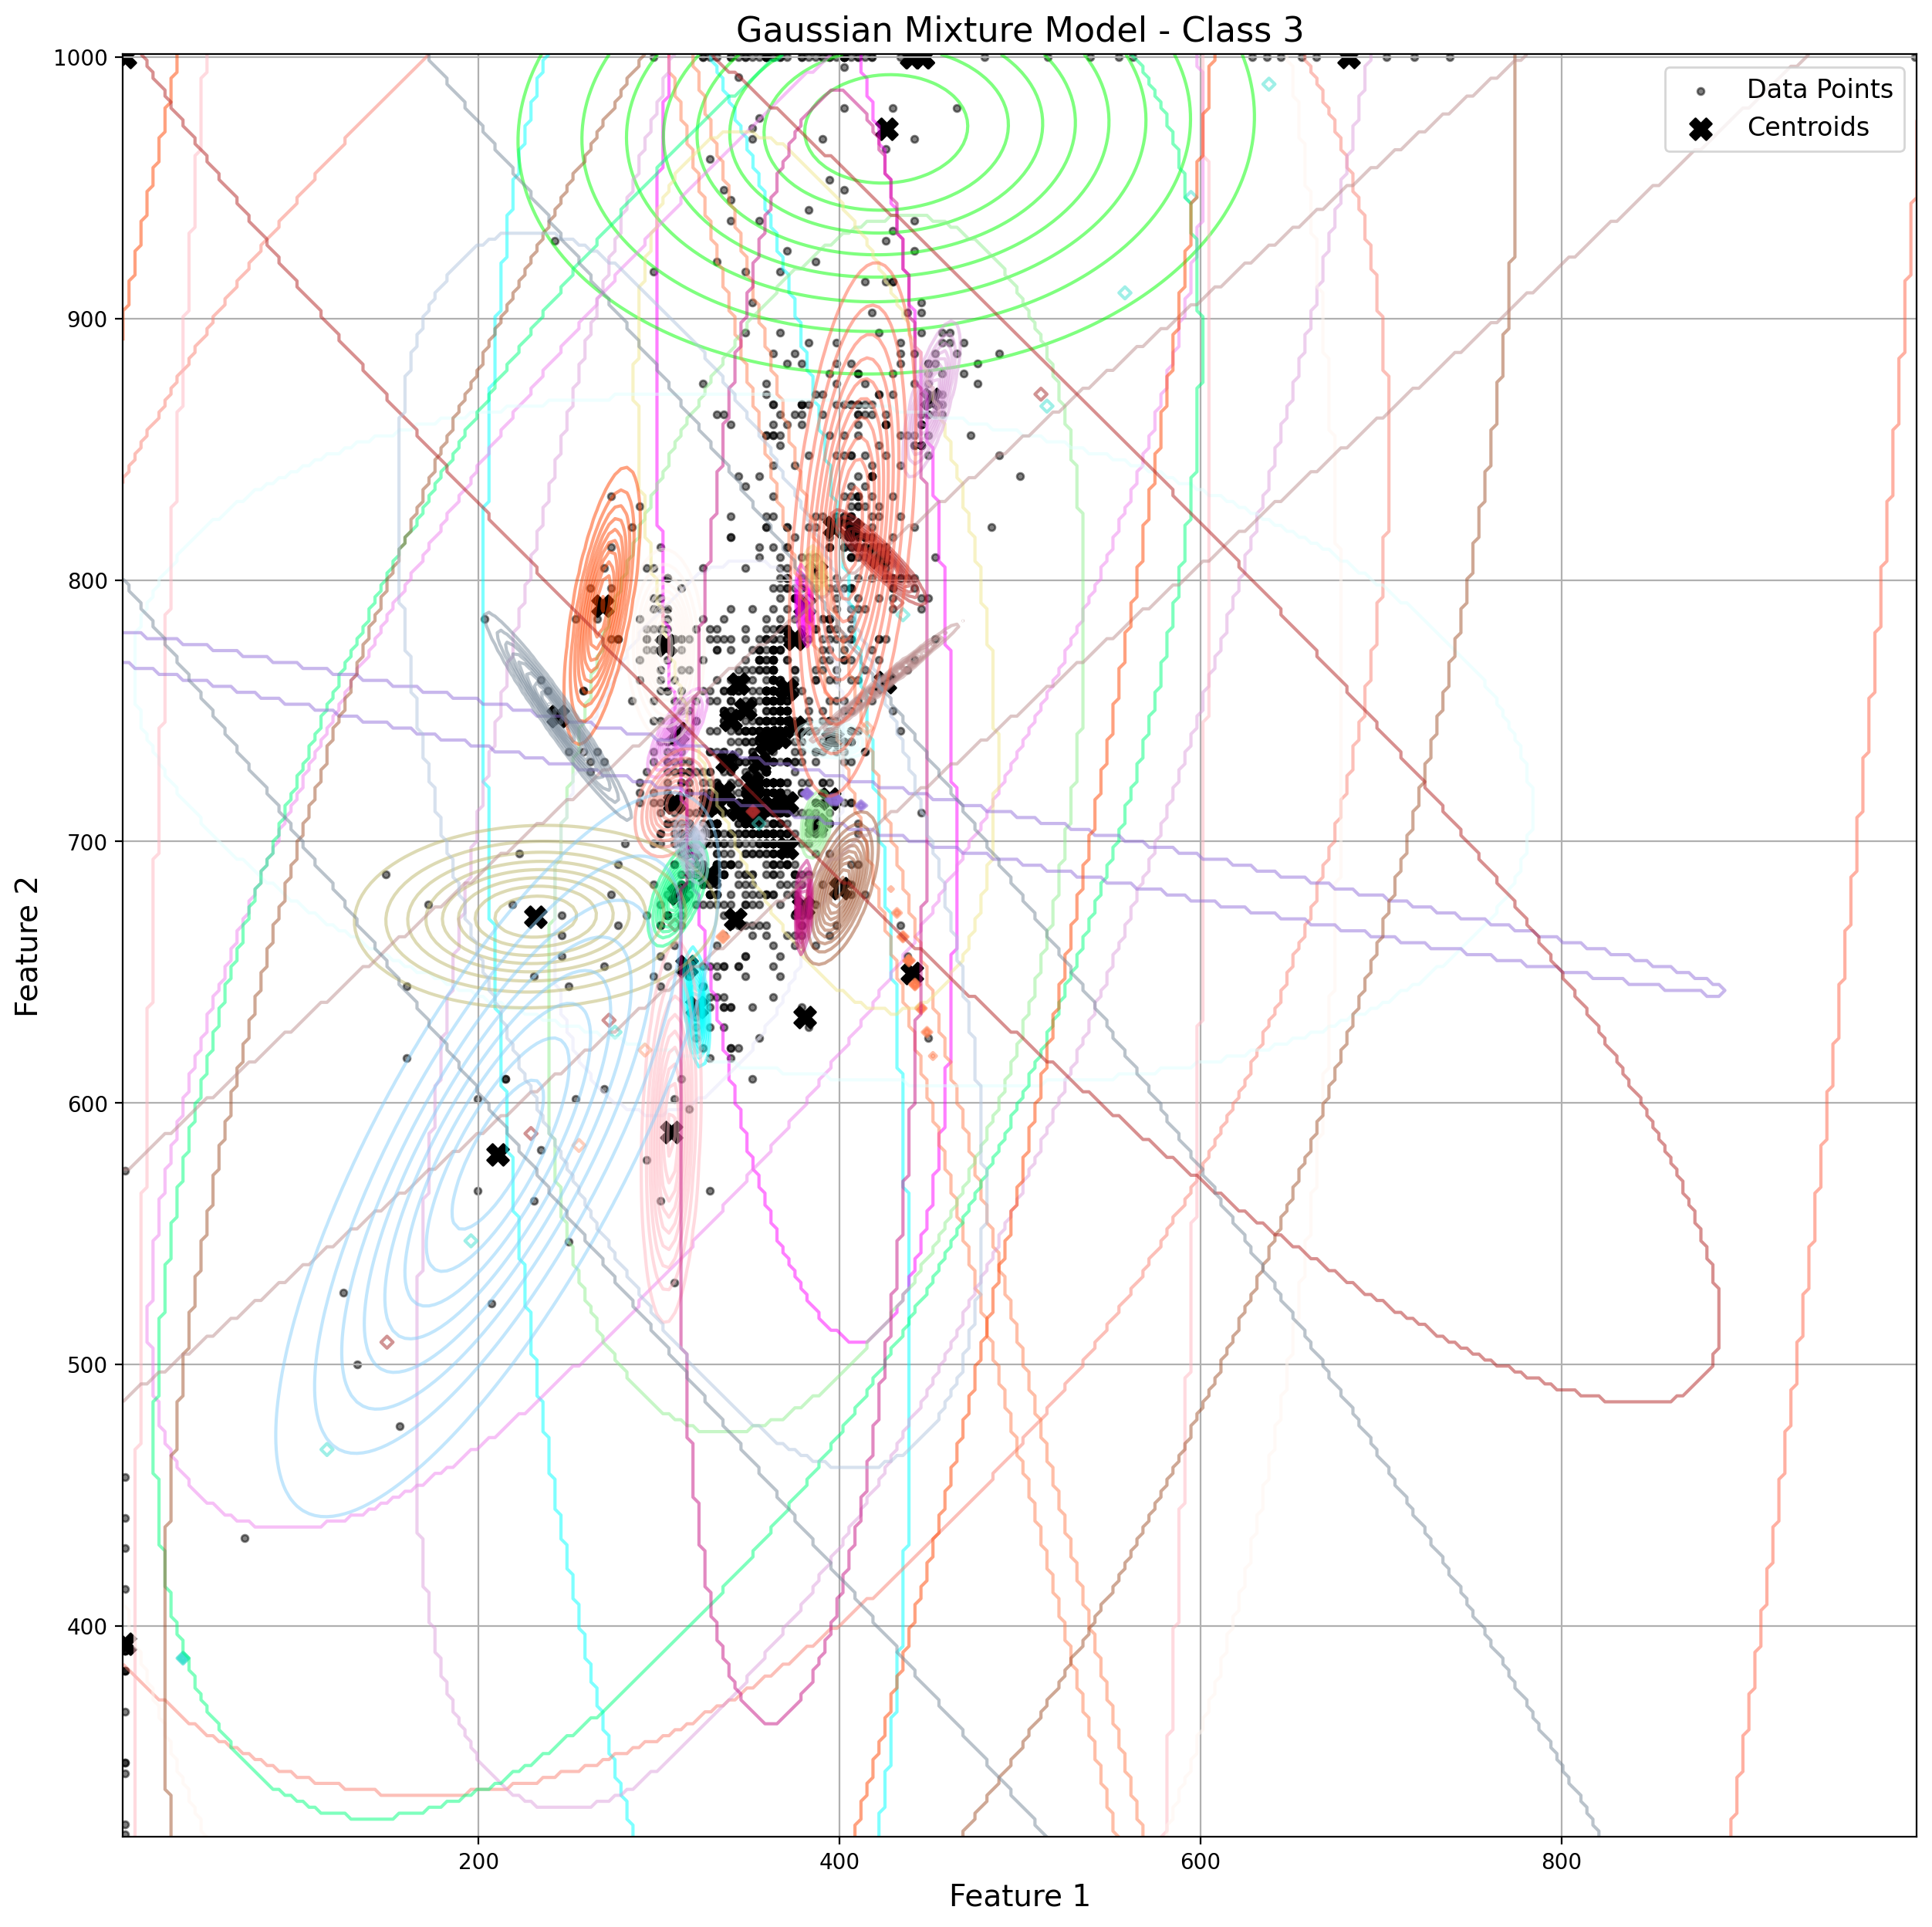

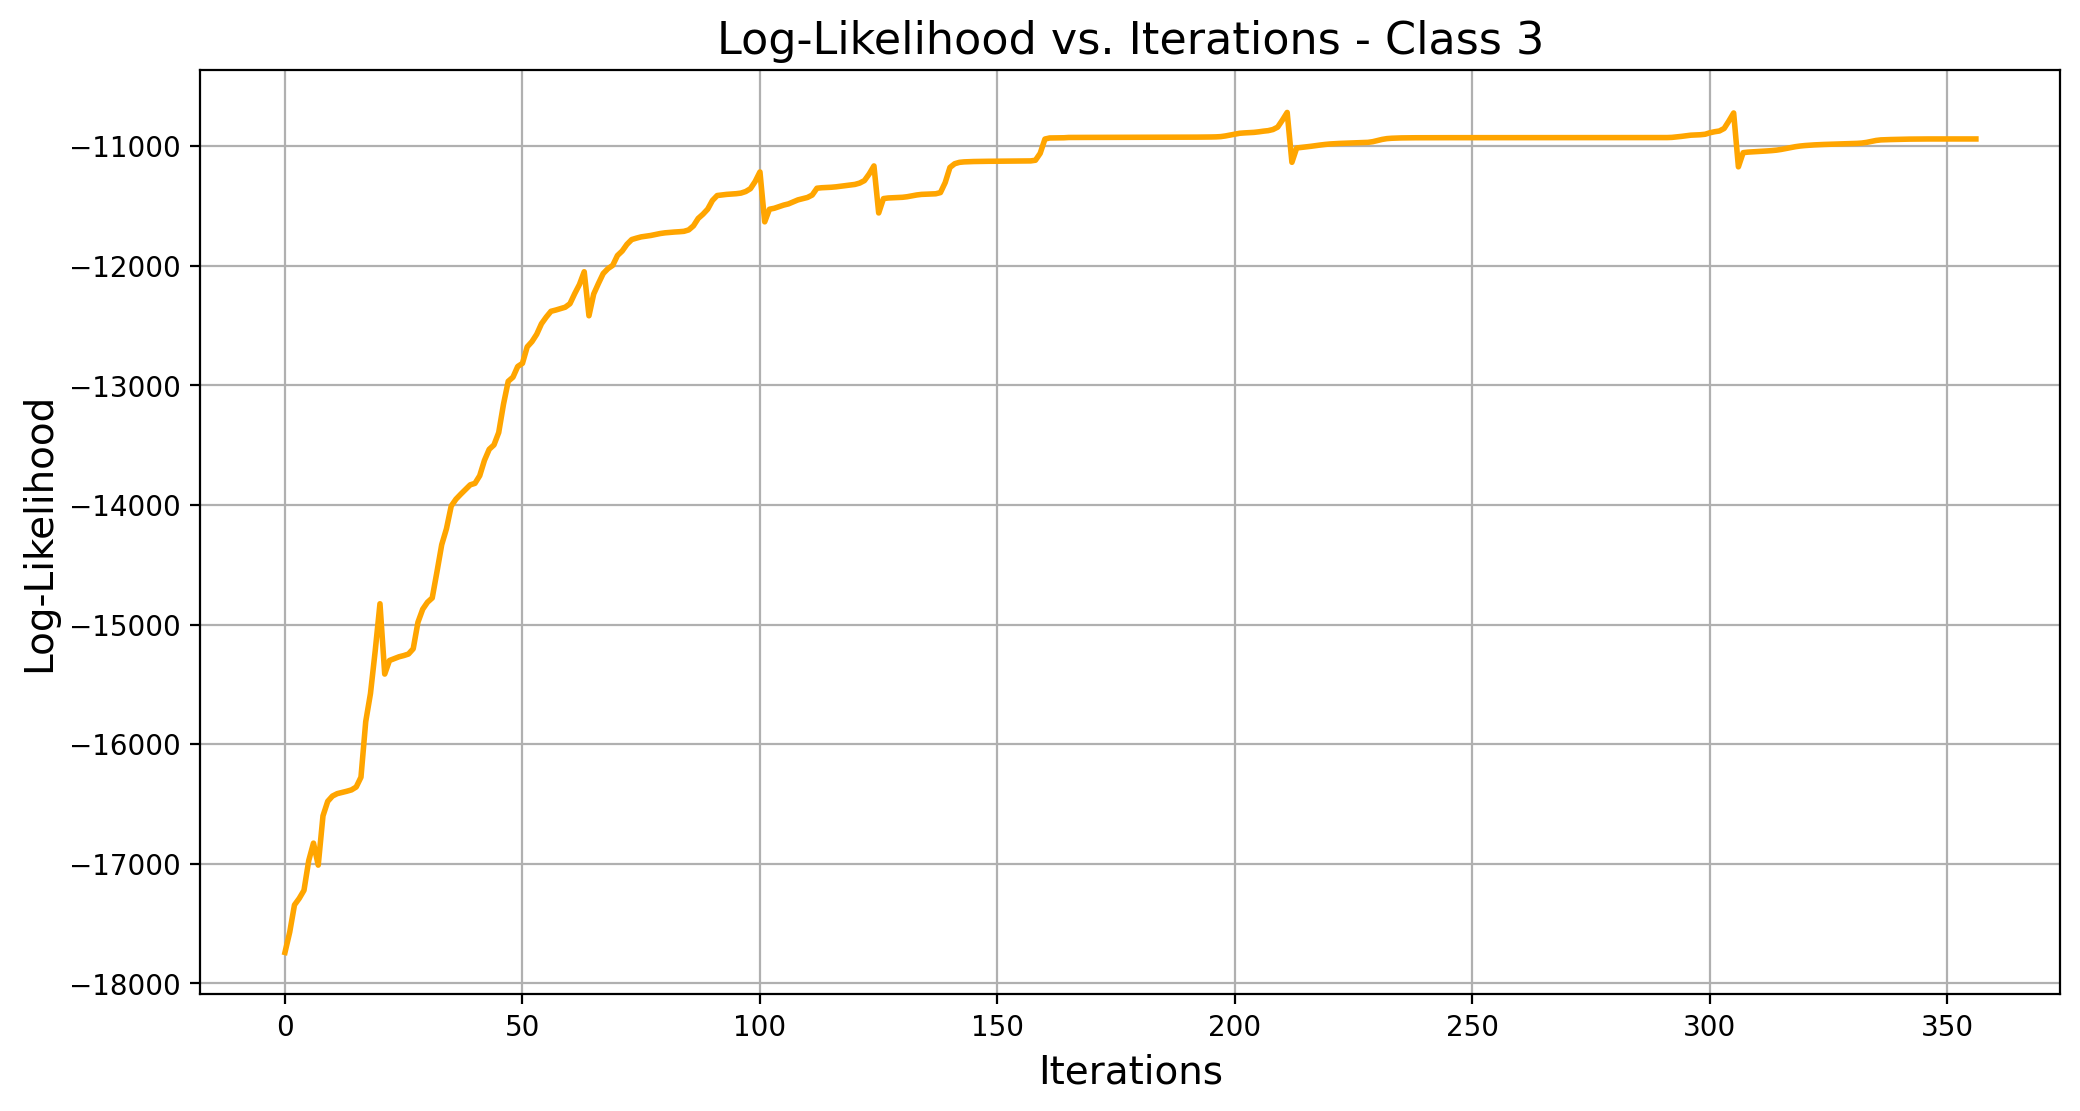

In [317]:
centroids3, cov_matrices3, cluster_weights3, log_likelihoods3, iterations3 = fit_k_gaussians(data3, centroids3, cov_matrices3, cluster_weights3, tolerance)
print(f"Class 3 converged in {iterations3} iterations.")
plot_results(log_likelihoods3, data3, centroids3, cov_matrices3, cluster_weights3, "Class 3", len(centroids3))
plot_log_likelihood(log_likelihoods3, "Class 3")

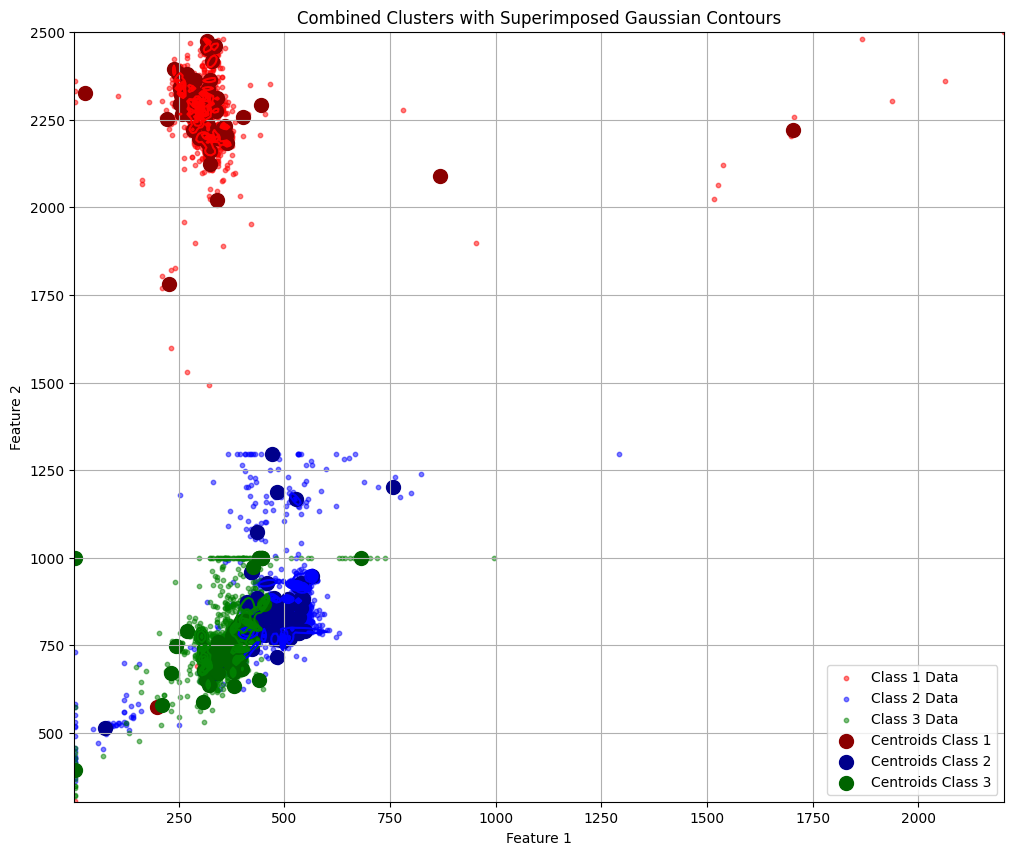

In [318]:
import numpy as np
import matplotlib.pyplot as plt

def plot_combined_clusters(data1, data2, data3, centroids1, centroids2, centroids3, 
                           cov_matrices1, cov_matrices2, cov_matrices3, 
                           cluster_weights1, cluster_weights2, cluster_weights3, 
                           k_clusters):

    # Combine the data to get the limits
    all_data = np.vstack((data1, data2, data3))
    x_min, x_max = np.min(all_data[:, 0]), np.max(all_data[:, 0])
    y_min, y_max = np.min(all_data[:, 1]), np.max(all_data[:, 1])

    # Define a grid for contour plotting
    X, Y = np.meshgrid(np.linspace(x_min - 1, x_max + 1, 300), 
                       np.linspace(y_min - 1, y_max + 1, 300))
    Z1 = np.zeros_like(X)
    Z2 = np.zeros_like(X)
    Z3 = np.zeros_like(X)

    # Function to calculate the Gaussian density
    def multivariate_gaussian(X, mu, cov):
        size = len(mu)
        det = np.linalg.det(cov)
        norm_const = 1.0 / (np.power((2 * np.pi), size / 2) * np.sqrt(det))
        X_mu = X - mu
        inv = np.linalg.inv(cov)
        result = np.einsum('...i,ij,...j->...', X_mu, inv, X_mu)
        return norm_const * np.exp(-0.5 * result)

    # Loop over the clusters and compute densities for each class
    for i in range(k_clusters):
        if i < len(centroids1):
            mean1 = centroids1[i]
            cov1 = cov_matrices1[i]
            weight1 = cluster_weights1[i]
            Z1 += weight1 * multivariate_gaussian(np.dstack((X, Y)), mean1, cov1)

        if i < len(centroids2):
            mean2 = centroids2[i]
            cov2 = cov_matrices2[i]
            weight2 = cluster_weights2[i]
            Z2 += weight2 * multivariate_gaussian(np.dstack((X, Y)), mean2, cov2)

        if i < len(centroids3):
            mean3 = centroids3[i]
            cov3 = cov_matrices3[i]
            weight3 = cluster_weights3[i]
            Z3 += weight3 * multivariate_gaussian(np.dstack((X, Y)), mean3, cov3)

    # Plot the contours for each class
    plt.figure(figsize=(12, 10))

    # Class 1 contours (Red)
    plt.contour(X, Y, Z1, levels=np.linspace(0, np.max(Z1), 15), colors='red', linewidths=1.5, alpha=1.0)  
    # Class 2 contours (Blue)
    plt.contour(X, Y, Z2, levels=np.linspace(0, np.max(Z2), 15), colors='blue', linewidths=1.5, alpha=1.0)  
    # Class 3 contours (Green)
    plt.contour(X, Y, Z3, levels=np.linspace(0, np.max(Z3), 15), colors='green', linewidths=1.5, alpha=1.0)  

    # Plot data points with distinct colors for each class
    plt.scatter(data1[:, 0], data1[:, 1], c='red', s=10, label='Class 1 Data', alpha=0.5)
    plt.scatter(data2[:, 0], data2[:, 1], c='blue', s=10, label='Class 2 Data', alpha=0.5)
    plt.scatter(data3[:, 0], data3[:, 1], c='green', s=10, label='Class 3 Data', alpha=0.5)

    # Plot centroids for each class
    plt.scatter(centroids1[:, 0], centroids1[:, 1], c='darkred', s=100, marker='o', label='Centroids Class 1')
    plt.scatter(centroids2[:, 0], centroids2[:, 1], c='darkblue', s=100, marker='o', label='Centroids Class 2')
    plt.scatter(centroids3[:, 0], centroids3[:, 1], c='darkgreen', s=100, marker='o', label='Centroids Class 3')

    # Set limits based on data points
    plt.xlim(x_min - 1, x_max + 1)
    plt.ylim(y_min - 1, y_max + 1)
    plt.title('Combined Clusters with Superimposed Gaussian Contours')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

# Example Usage:
plot_combined_clusters(data1, data2, data3, centroids1, centroids2, centroids3, 
        cov_matrices1, cov_matrices2, cov_matrices3, 
                       cluster_weights1, cluster_weights2, cluster_weights3, 
                       k)


In [319]:
def gaussian_pdf(x, mean, cov):
    n = x.shape[1]
    try:
        cov_inv = np.linalg.inv(cov)
    except np.linalg.LinAlgError:
        # Regularize covariance matrix if singular
        cov += 1e-6 * np.eye(n)
        cov_inv = np.linalg.inv(cov)
    diff = x - mean
    exponent = np.einsum('ij,jk,ik->i', diff, cov_inv, diff)
    denominator = np.sqrt((2 * np.pi) ** n * np.linalg.det(cov))
    return np.exp(-0.5 * exponent) / denominator
test_labels1 = np.zeros(len(test_data1), dtype=int)
test_labels2 = np.ones(len(test_data2), dtype=int)
test_labels3 = np.full(len(test_data3), 2, dtype=int)
test_data_combined = np.vstack((test_data1, test_data2, test_data3))
test_labels_combined = np.hstack((test_labels1, test_labels2, test_labels3))

In [320]:
import numpy as np

def confusion_matrix(true_labels, pred_labels, num_classes):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for t, p in zip(true_labels, pred_labels):
        cm[t][p] += 1
    return cm

def precision_recall_f1(cm):
    num_classes = cm.shape[0]
    precision = np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    
    for i in range(num_classes):
        TP = cm[i, i]  # True positives for class i
        FP = np.sum(cm[:, i]) - TP  # False positives for class i
        FN = np.sum(cm[i, :]) - TP  # False negatives for class i
        
        precision[i] = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall[i] = TP / (TP + FN) if (TP + FN) > 0 else 0
        if precision[i] + recall[i] > 0:
            f1[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])
        else:
            f1[i] = 0

    return precision, recall, f1

def classify(data, class_params):
    class_probs = []
    for means, covariances, mixing_coeffs in class_params:
        k = len(means)
        class_prob = np.sum([mixing_coeffs[j] * gaussian_pdf(data, means[j], covariances[j])
                             for j in range(k)], axis=0)
        class_probs.append(class_prob)

    return np.argmax(class_probs, axis=0)

def predict_gmm(gmm_params, test_data):
    predictions = classify(test_data, gmm_params)
    return predictions


gmm_params = [[centroids1, cov_matrices1, cluster_weights1], 
              [centroids2, cov_matrices2, cluster_weights2], 
              [centroids3, cov_matrices3, cluster_weights3]]


predictions = predict_gmm(gmm_params, test_data_combined)


accuracy = np.mean(predictions == test_labels_combined)
print(f"Accuracy: {accuracy:.2f}")


cm = confusion_matrix(test_labels_combined, predictions, num_classes=3)
print("Confusion Matrix:")
print(cm)


precision, recall, f1 = precision_recall_f1(cm)

for i in range(3):
    print(f"Class {i+1} -> Precision: {precision[i]:.2f}, Recall: {recall[i]:.2f}, F1-Score: {f1[i]:.2f}")


Accuracy: 0.91
Confusion Matrix:
[[717   0   0]
 [  0 661  76]
 [  0 113 634]]
Class 1 -> Precision: 1.00, Recall: 1.00, F1-Score: 1.00
Class 2 -> Precision: 0.85, Recall: 0.90, F1-Score: 0.87
Class 3 -> Precision: 0.89, Recall: 0.85, F1-Score: 0.87


# 